# Symptoms to Disease Prediction and Analysis

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
import pickle
%matplotlib inline

In [2]:
# Load Datasets

df = pd.read_csv('../data/dataset.csv')
df.head()

Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Symptom_16 Symptom_17  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [5]:
df.shape

(4920, 18)

In [6]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [8]:
df.describe()

Disease  Symptom_1  Symptom_2 Symptom_3    Symptom_4  \
count               4920       4920       4920      4920         4572   
unique                41         34         48        54           50   
top     Fungal infection   vomiting   vomiting   fatigue   high_fever   
freq                 120        822        870       726          378   

        Symptom_5 Symptom_6        Symptom_7        Symptom_8  \
count        3714      2934             2268             1944   
unique         38        32               26               21   
top      headache    nausea   abdominal_pain   abdominal_pain   
freq          348       390              264              276   

                 Symptom_9          Symptom_10     Symptom_11 Symptom_12  \
count                 1692                1512           1194        744   
unique                  22                  21             18         11   
top      yellowing_of_eyes   yellowing_of_eyes   irritability    malaise   
freq                   228                 198            120        126   

          Symptom_13   Symptom_14   Symptom_15        Symptom_16    Symptom_17  
count            504          306          240               192            72  
unique             8            4            3                 3             1  
top      muscle_pain   chest_pain   chest_pain   blood_in_sputum   muscle_pain  
freq              72           96          144                72            72

In [9]:
df = df.fillna(0)

In [10]:
df["Symptom_4"].value_counts()

Symptom_4
 high_fever                      378
0                                348
 lethargy                        222
 yellowish_skin                  216
 sweating                        216
 weight_loss                     192
 vomiting                        174
 cough                           162
 loss_of_balance                 144
 dark_urine                      144
 nausea                          120
 loss_of_appetite                120
 breathlessness                  108
 hip_joint_pain                   96
 blurred_and_distorted_vision     96
 movement_stiffness               96
 restlessness                     96
 bloody_stool                     96
 swelling_of_stomach              96
 silver_like_dusting              96
 obesity                          96
 mood_swings                      90
 spinning_movements               90
 dizziness                        84
 abdominal_pain                   84
 red_sore_around_nose             84
 altered_sensorium          

In [11]:
df["Disease"].value_counts()

Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11704\2842463059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Disease", data=df, palette="Spectral")


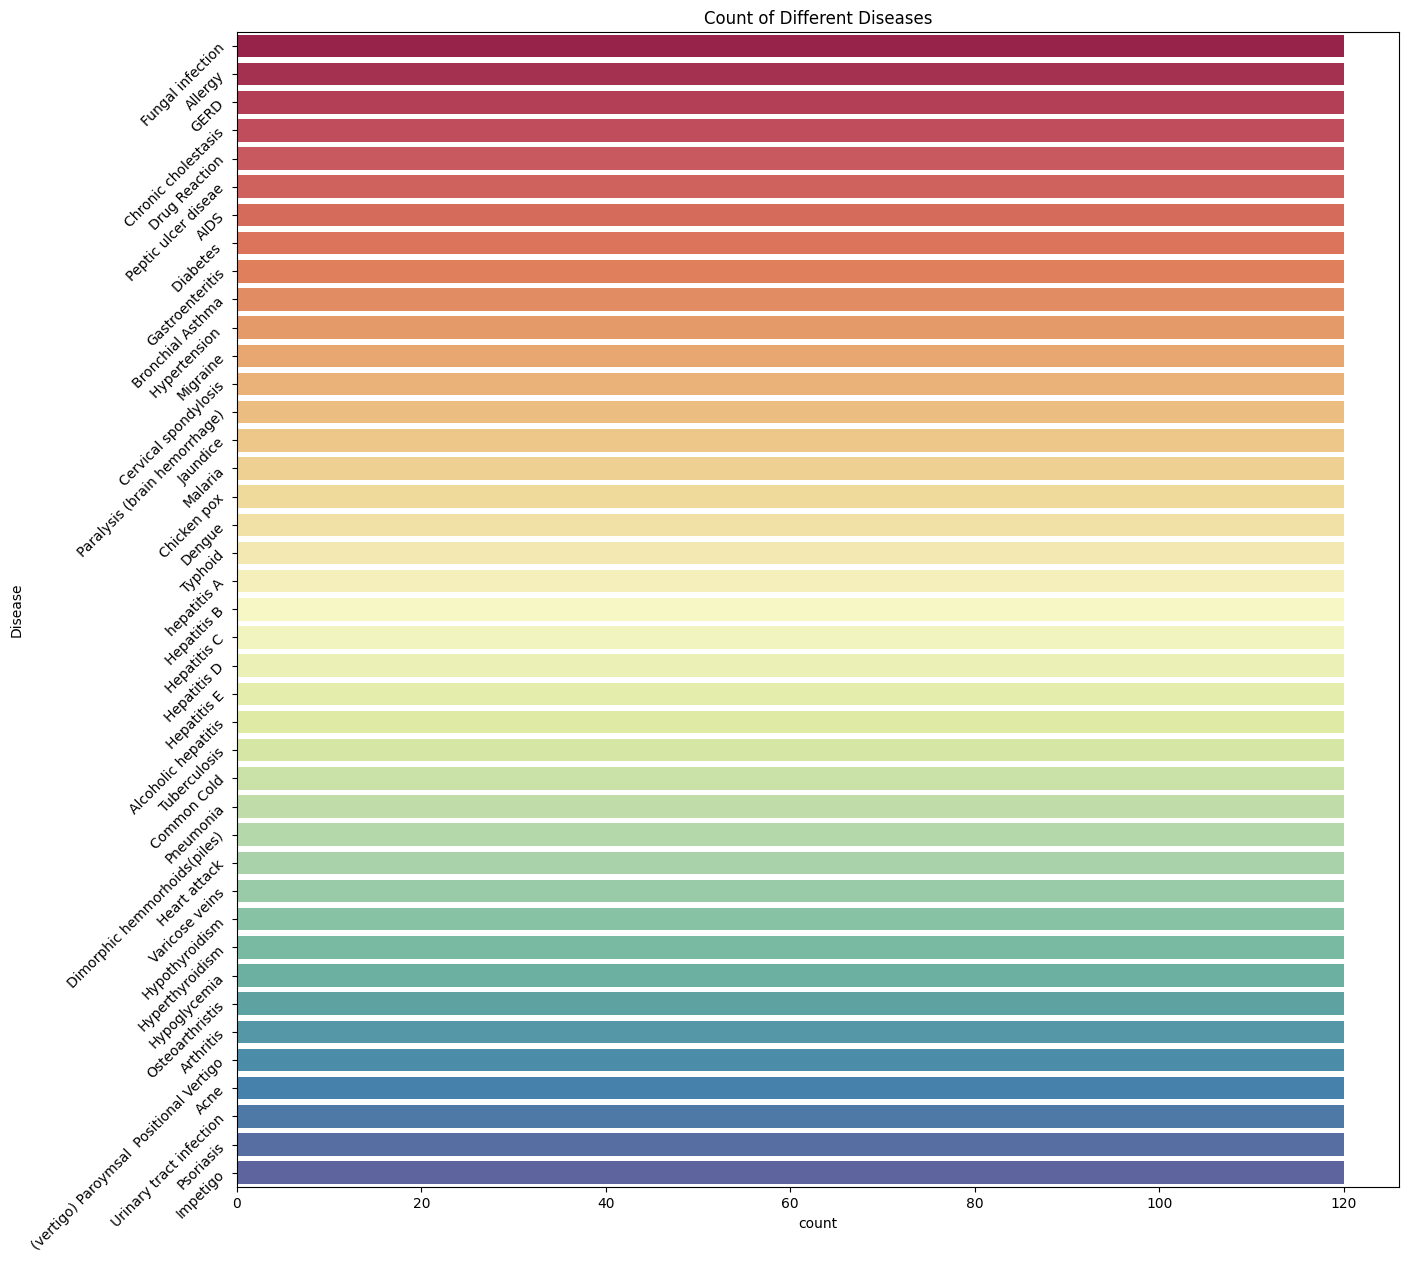

In [14]:
plt.figure(figsize=(15,15))
sns.countplot(y="Disease", data=df, palette="Spectral")
plt.yticks(rotation=45)
plt.title("Count of Different Diseases")
plt.show()

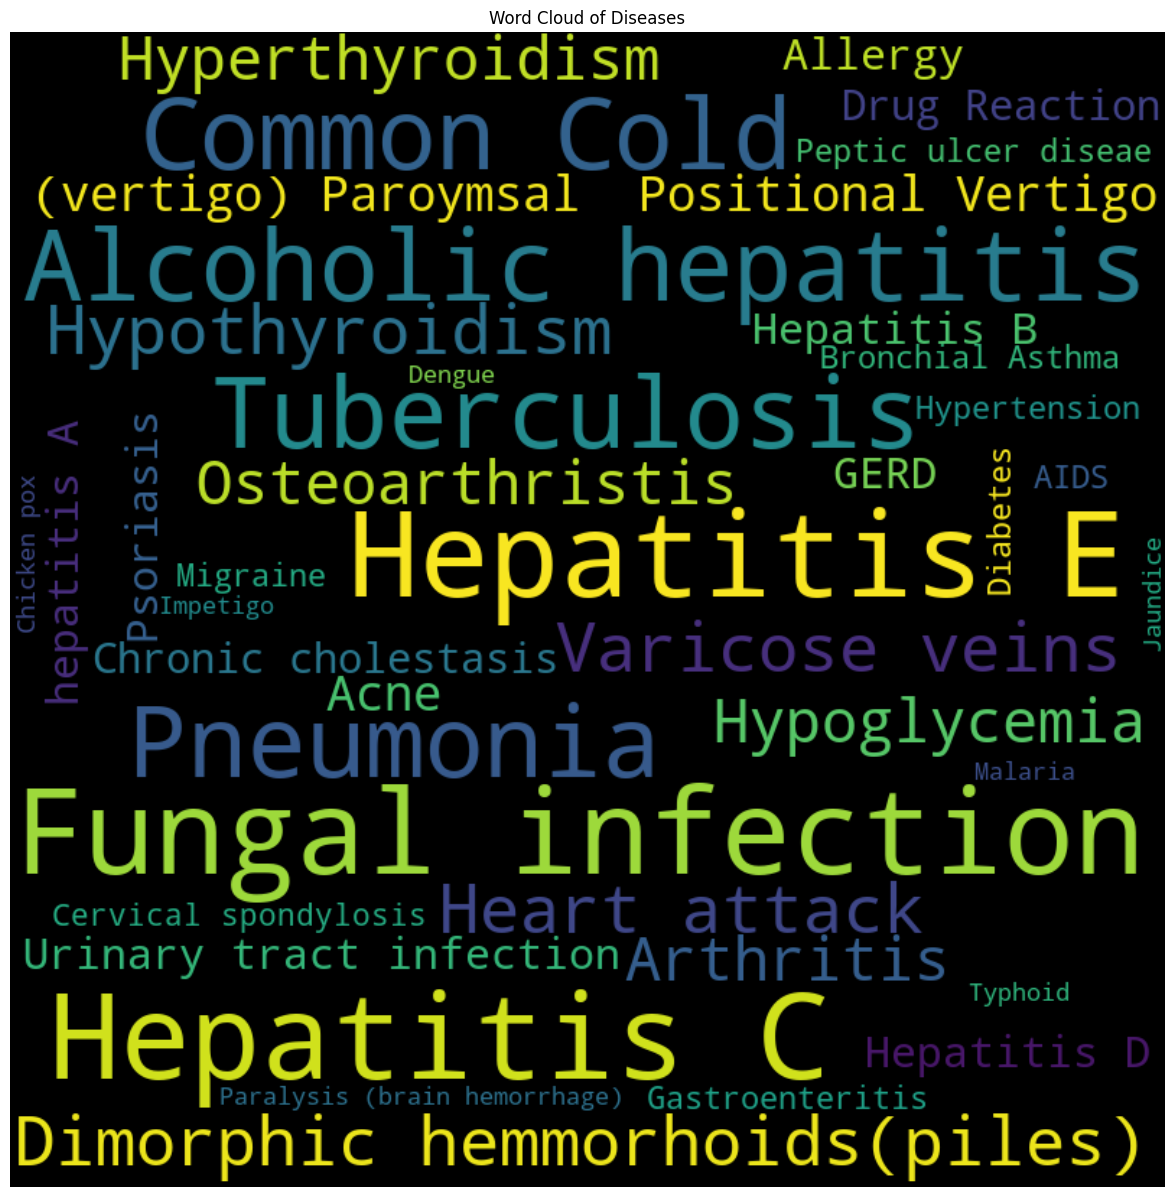

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='black', width=800, height=800).generate_from_frequencies(df['Disease'].value_counts())

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Diseases')
plt.show()

In [16]:
df["Symptom_1"].value_counts()

Symptom_1
 vomiting                       822
 fatigue                        690
itching                         678
 skin_rash                      480
 chills                         474
 joint_pain                     462
 continuous_sneezing            222
 headache                       126
 acidity                        120
 stomach_pain                   114
 constipation                   114
 muscle_weakness                114
 burning_micturition            108
 muscle_wasting                 108
 back_pain                      108
 bladder_discomfort              12
 weight_gain                     12
 breathlessness                  12
 yellowish_skin                  12
 weakness_in_limbs               12
 chest_pain                      12
 cough                           12
 sunken_eyes                     12
 patches_in_throat               12
 indigestion                     12
 shivering                       12
 pain_during_bowel_movements      6
 cramps           

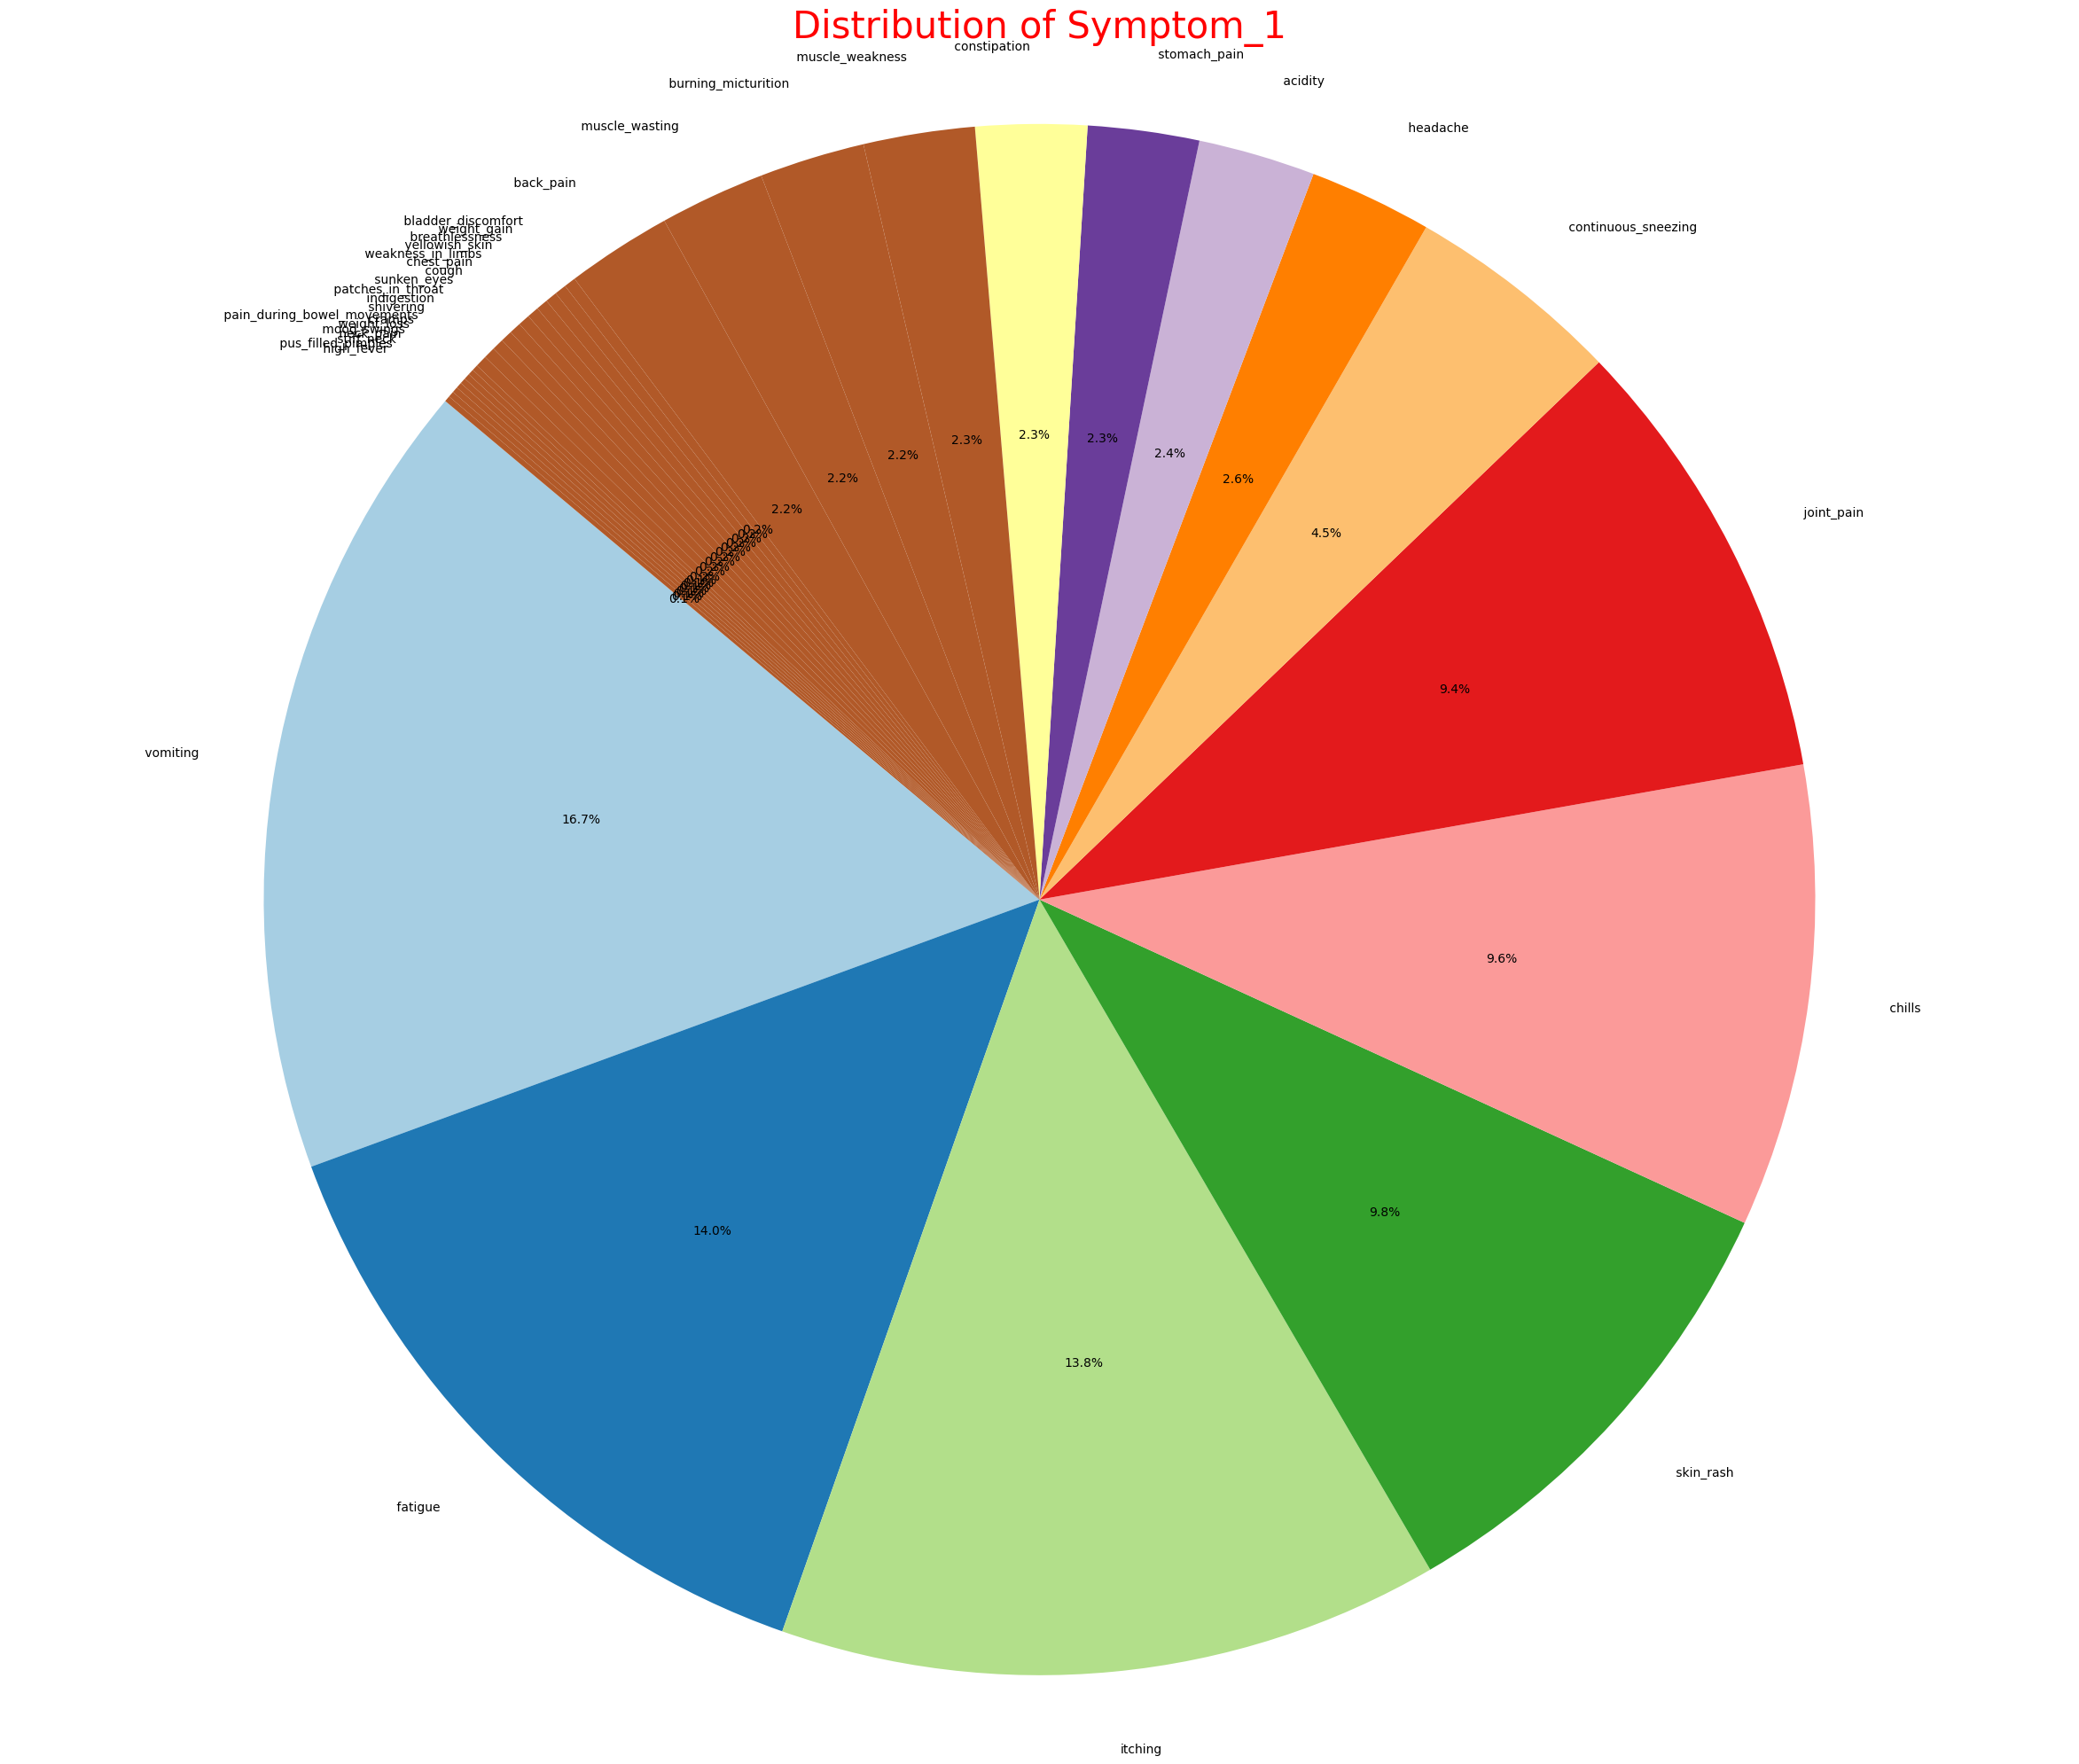

In [17]:
symptom_counts = df["Symptom_1"].value_counts()

plt.figure(figsize=(30,25))
colors = plt.cm.Paired(range(len(symptom_counts)))
plt.pie(symptom_counts, labels=symptom_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Symptom_1",fontsize=30,color="red")
plt.axis("equal")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11704\1181255900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Symptom_1', data=df, palette="bwr")


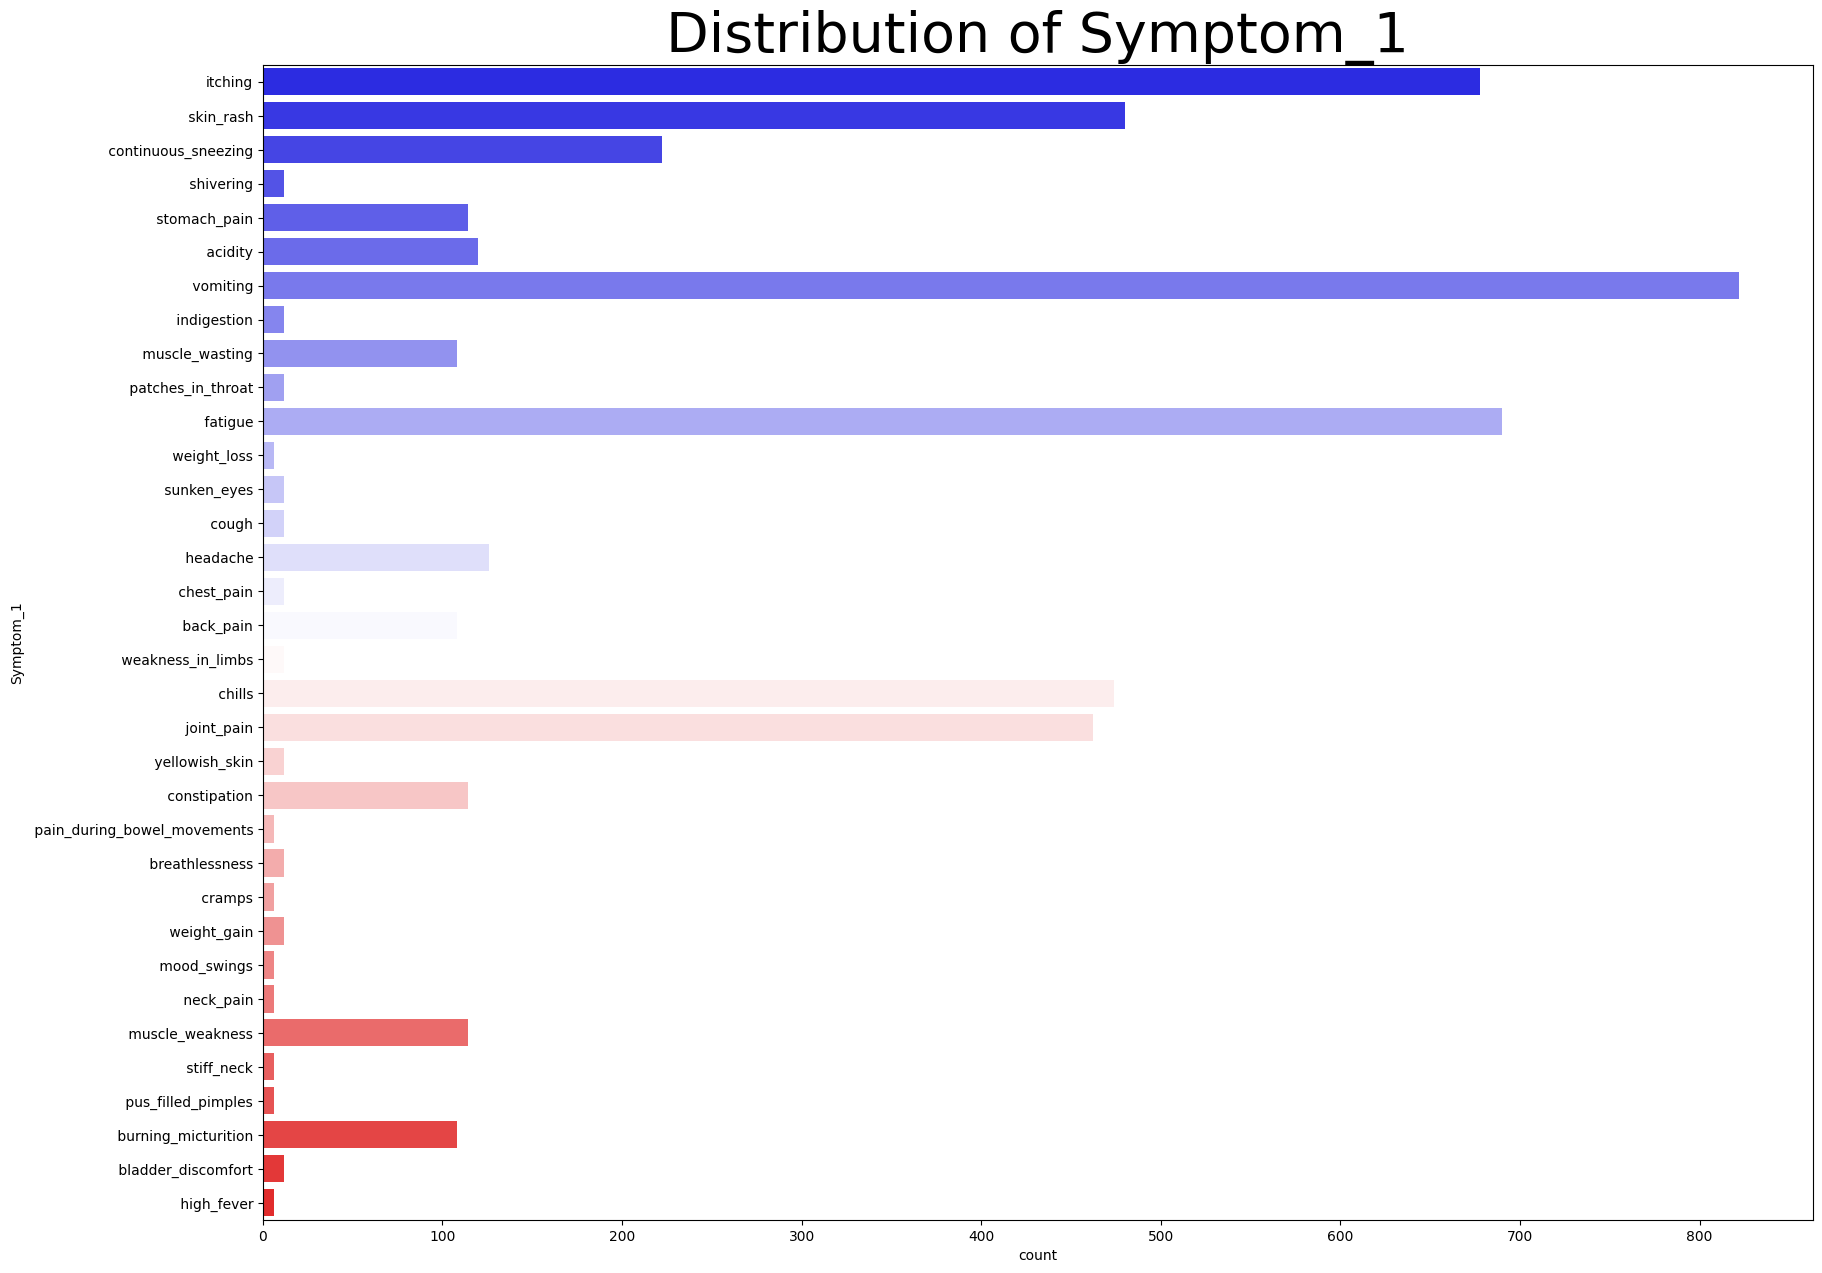

In [18]:
plt.figure(figsize=(20, 15))
sns.countplot(y='Symptom_1', data=df, palette="bwr")
plt.title("Distribution of Symptom_1",fontsize=40)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11704\2661227967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Symptom_2', data=df, palette="PiYG")


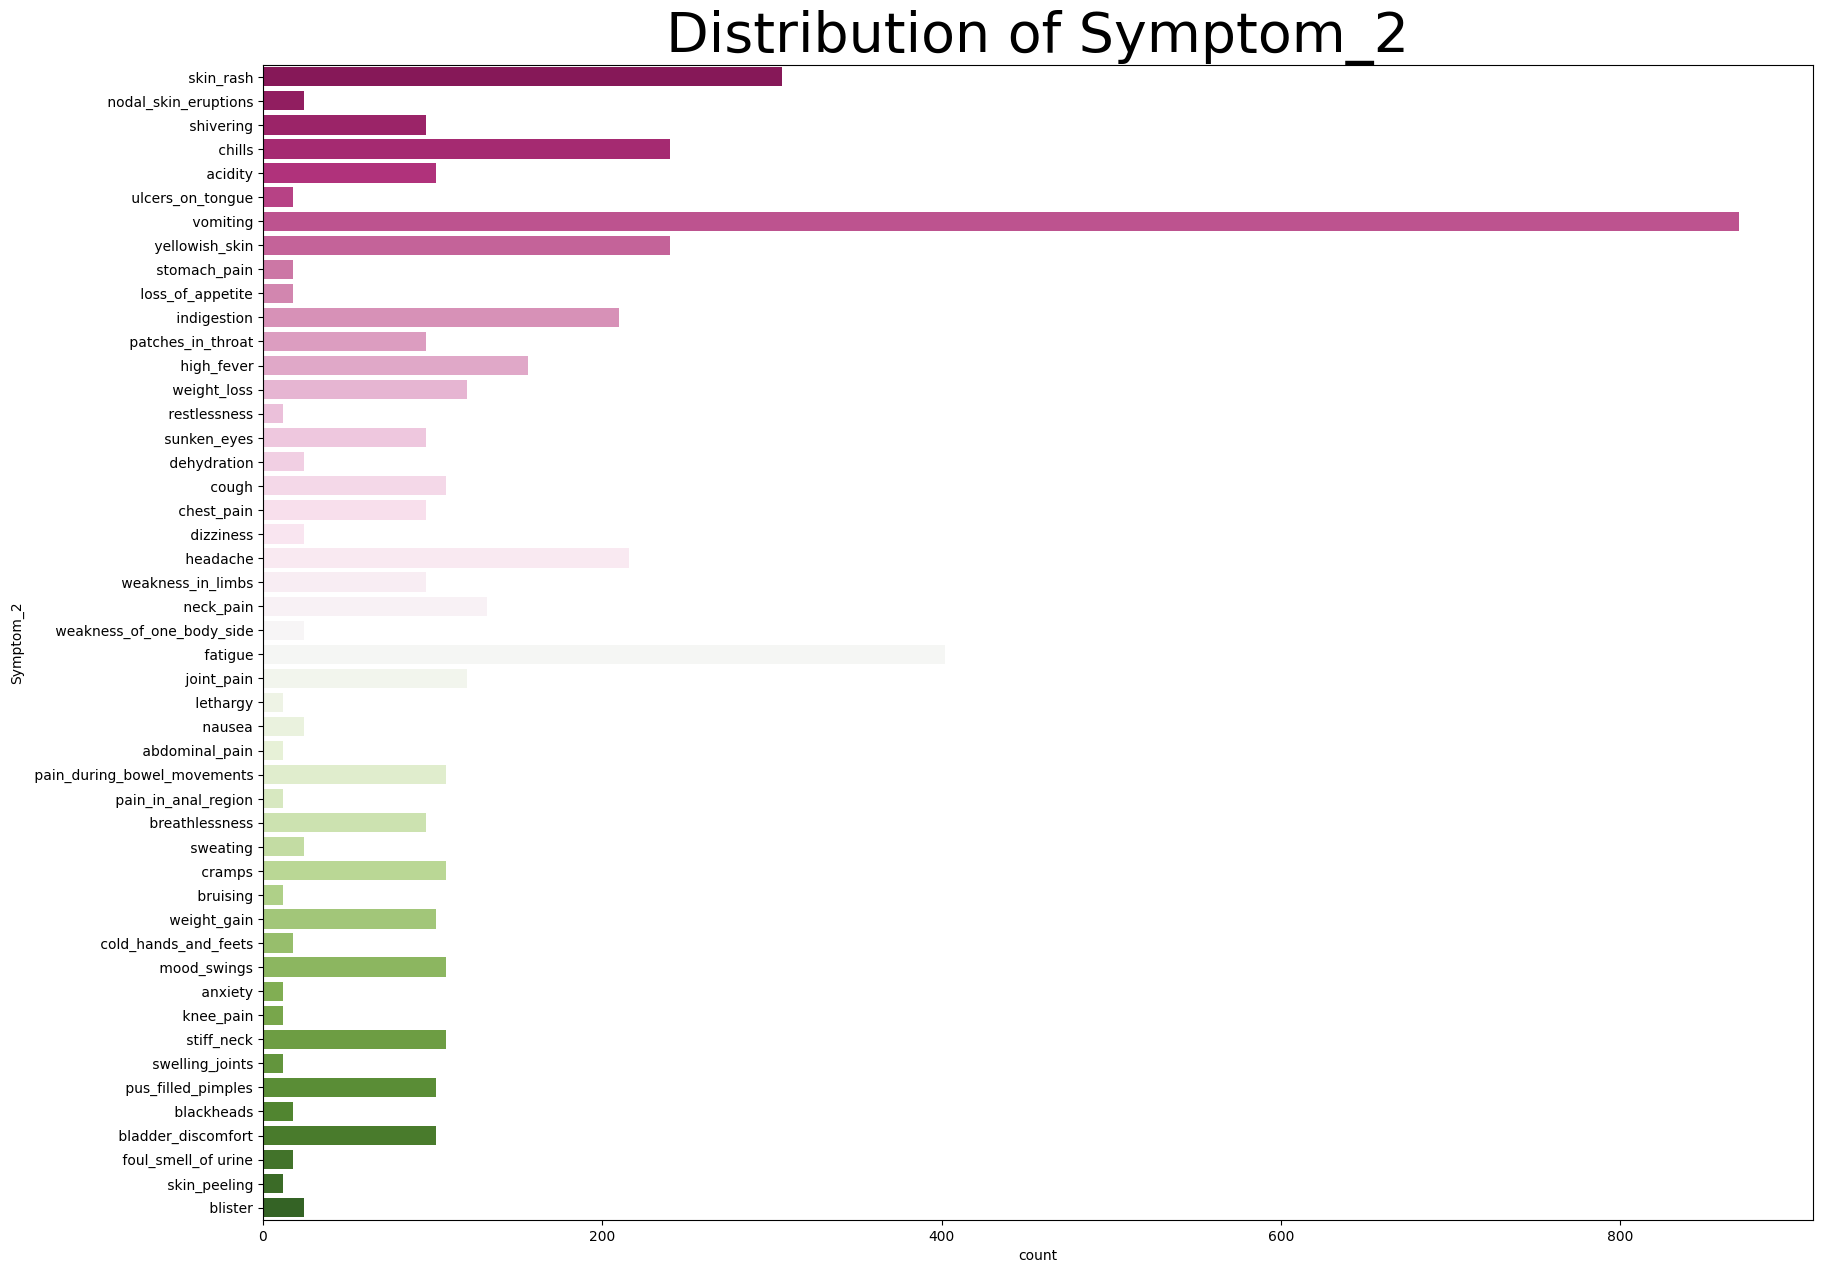

In [19]:
plt.figure(figsize=(20, 15))
sns.countplot(y='Symptom_2', data=df, palette="PiYG")
plt.title("Distribution of Symptom_2",fontsize=40)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11704\4070621301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Symptom_3', data=df, palette="PRGn")


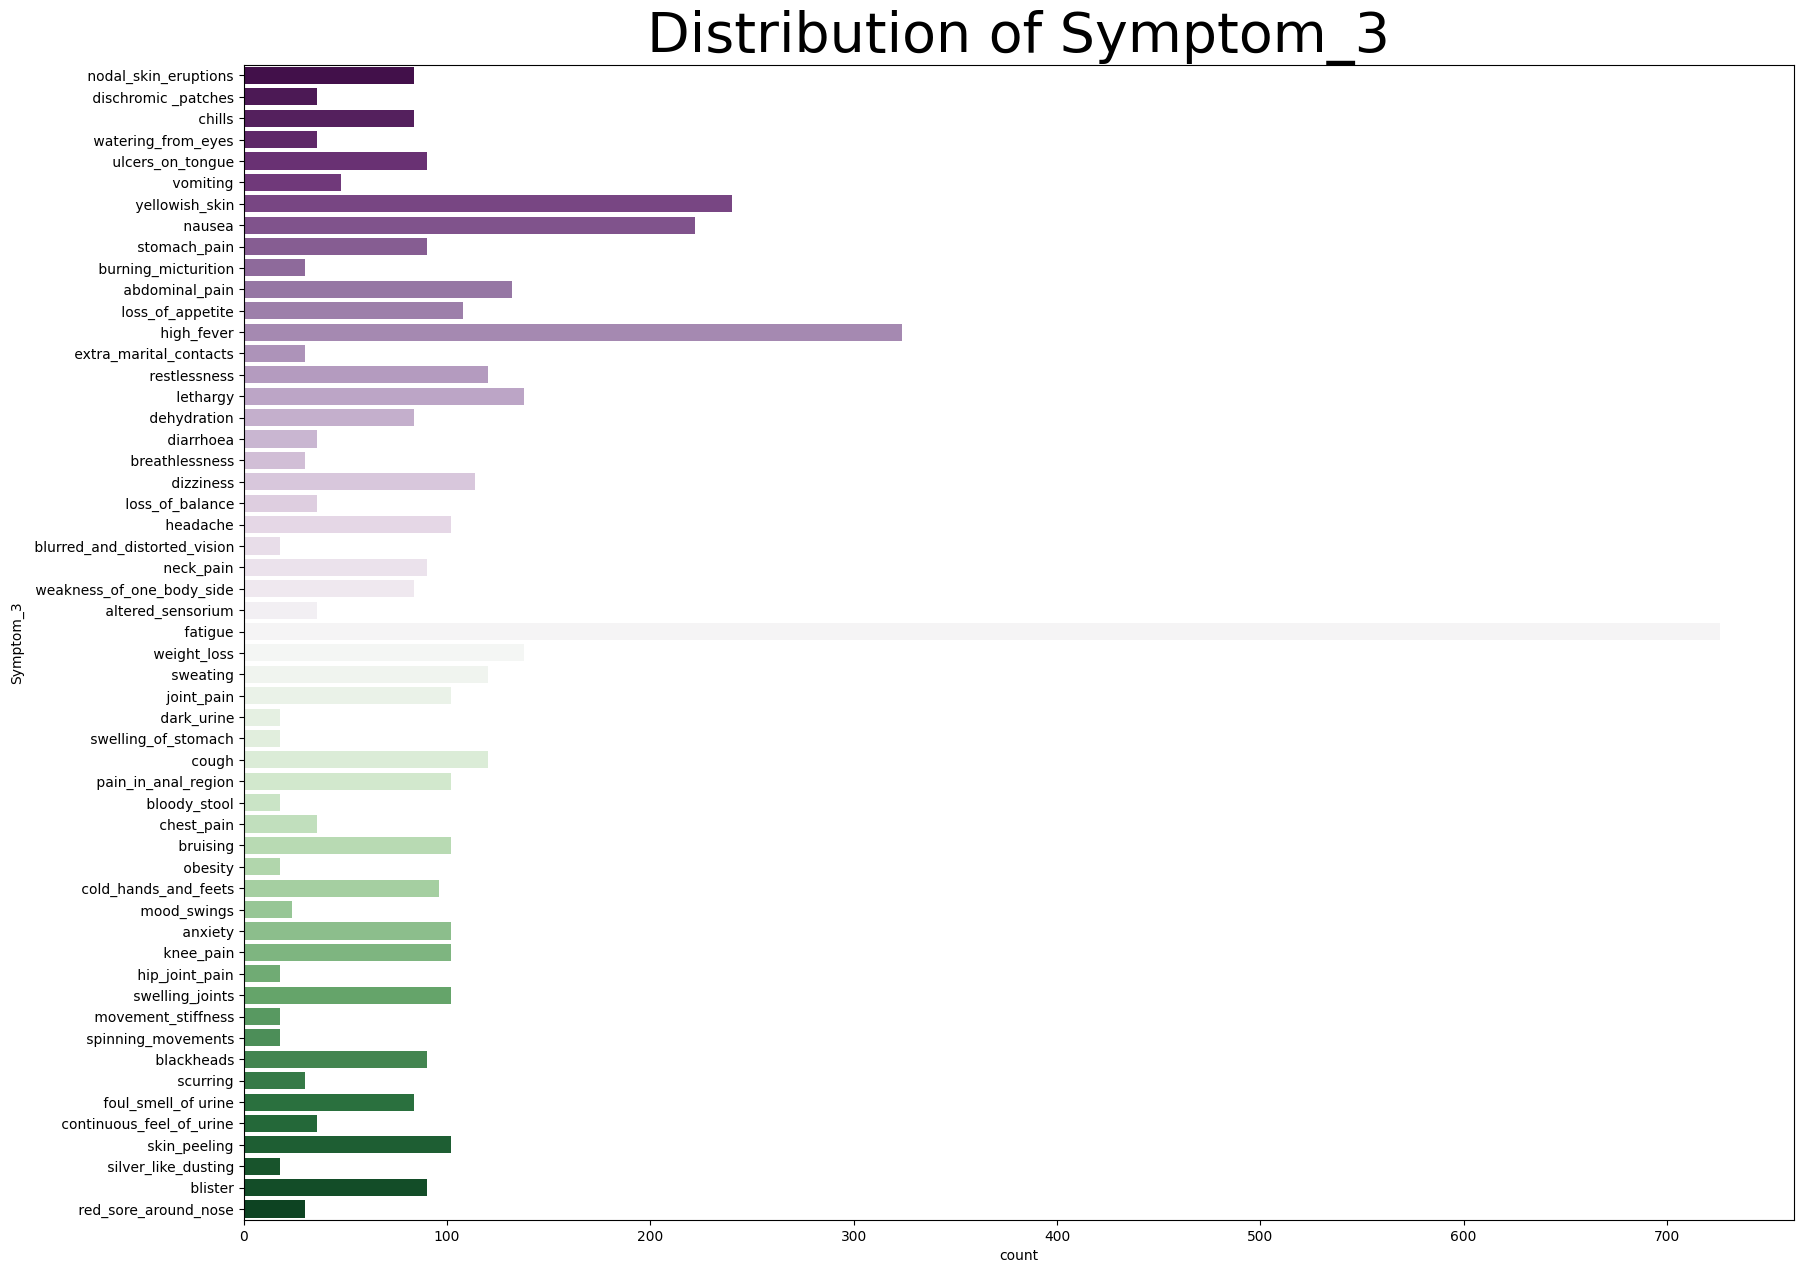

In [20]:
plt.figure(figsize=(20, 15))
sns.countplot(y='Symptom_3', data=df, palette="PRGn")
plt.title("Distribution of Symptom_3",fontsize=40)
plt.show()

In [21]:
df["Symptom_4"].value_counts()

Symptom_4
 high_fever                      378
0                                348
 lethargy                        222
 yellowish_skin                  216
 sweating                        216
 weight_loss                     192
 vomiting                        174
 cough                           162
 loss_of_balance                 144
 dark_urine                      144
 nausea                          120
 loss_of_appetite                120
 breathlessness                  108
 hip_joint_pain                   96
 blurred_and_distorted_vision     96
 movement_stiffness               96
 restlessness                     96
 bloody_stool                     96
 swelling_of_stomach              96
 silver_like_dusting              96
 obesity                          96
 mood_swings                      90
 spinning_movements               90
 dizziness                        84
 abdominal_pain                   84
 red_sore_around_nose             84
 altered_sensorium          

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11704\2019985787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Symptom_4', data=df, palette="coolwarm")


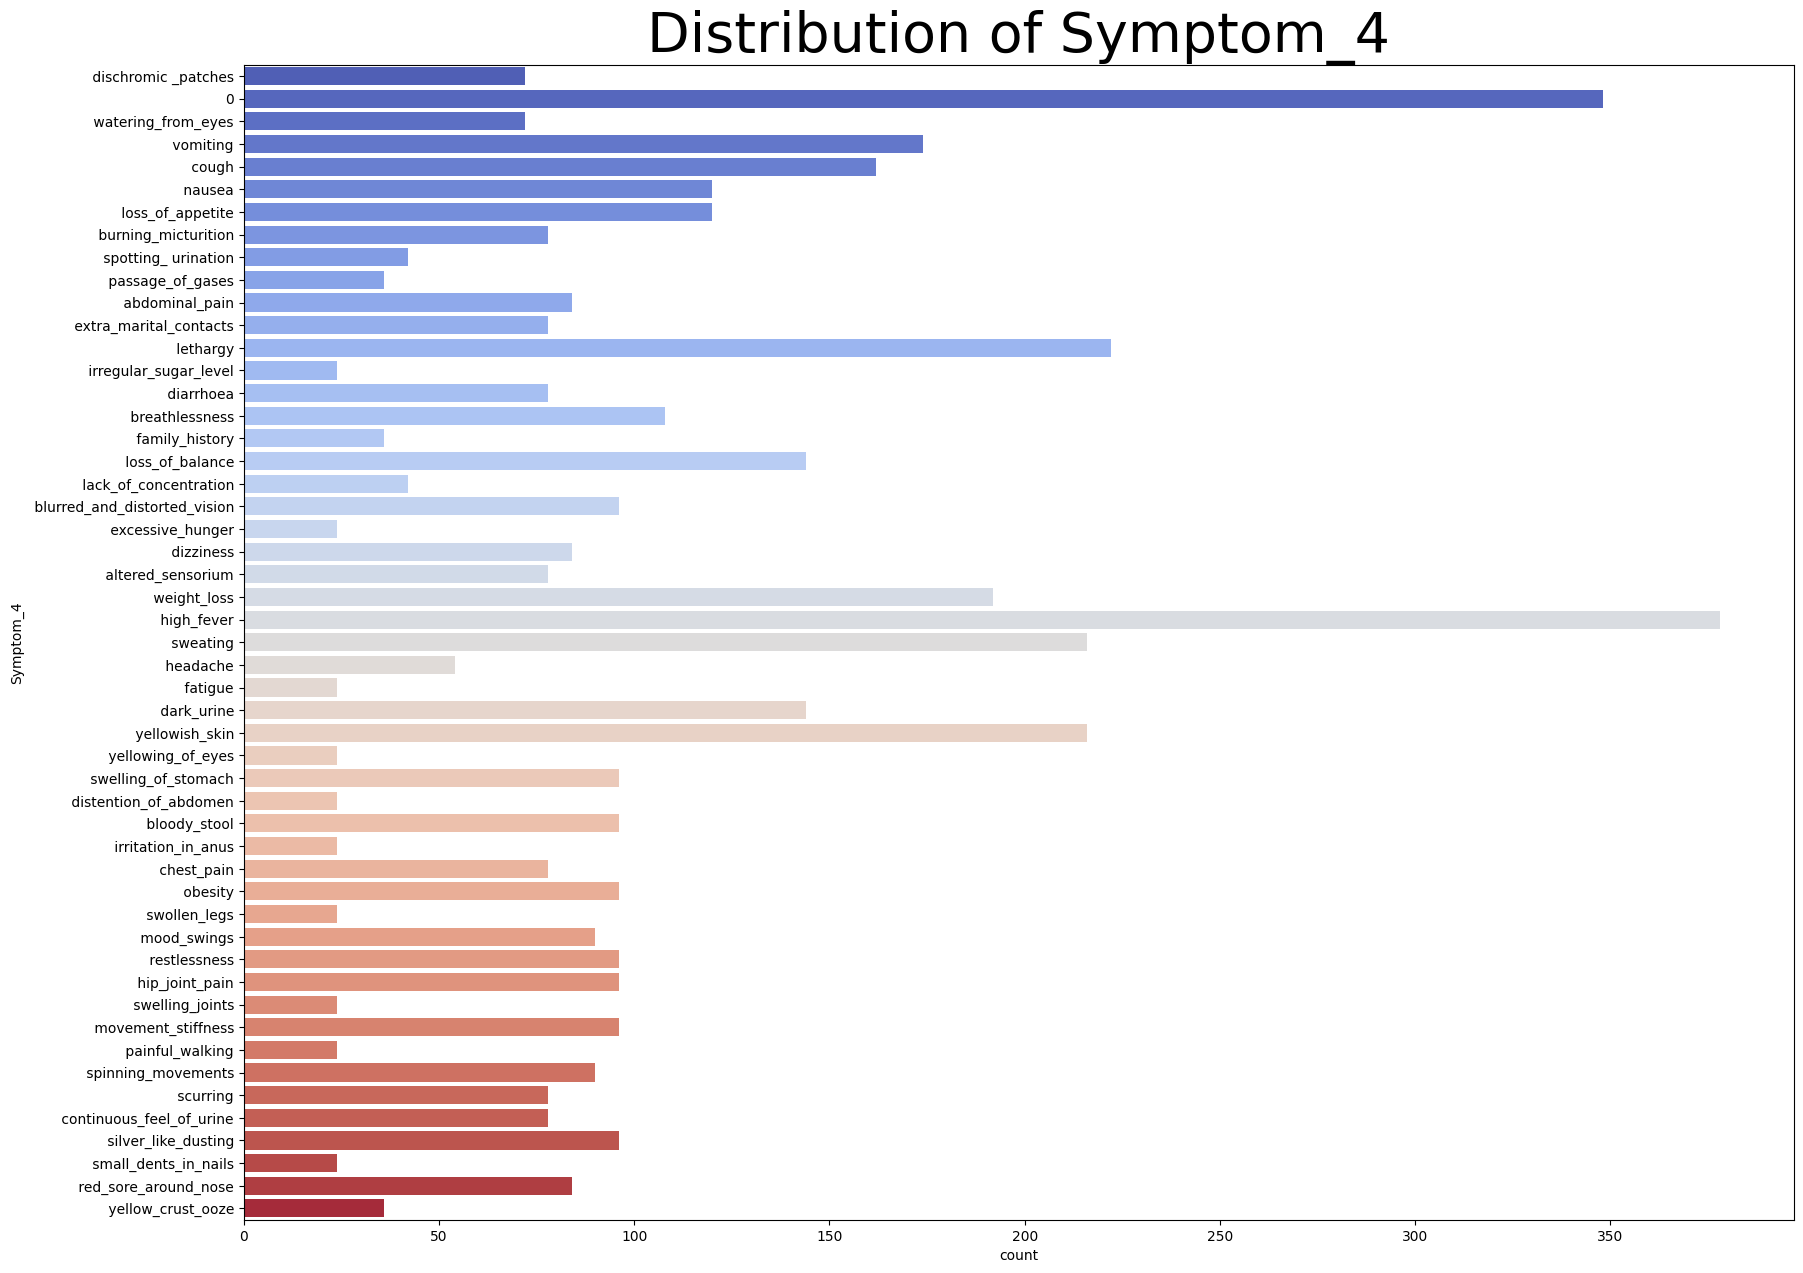

In [22]:
plt.figure(figsize=(20, 15))
sns.countplot(y='Symptom_4', data=df, palette="coolwarm")
plt.title("Distribution of Symptom_4",fontsize=40)
plt.show()

In [23]:
df["Symptom_5"].value_counts()

Symptom_5
0                                  1206
 headache                           348
 high_fever                         330
 dark_urine                         210
 nausea                             192
 loss_of_balance                    162
 cough                              162
 loss_of_appetite                   150
 sweating                           120
 painful_walking                    120
 yellowish_skin                     120
 family_history                     114
 swollen_legs                        90
 fatigue                             90
 irritation_in_anus                  90
 breathlessness                      90
 distention_of_abdomen               90
 excessive_hunger                    90
 swelling_joints                     90
 irregular_sugar_level               90
 small_dents_in_nails                90
 lethargy                            84
 yellowing_of_eyes                   84
 yellow_crust_ooze                   78
 passage_of_gases             

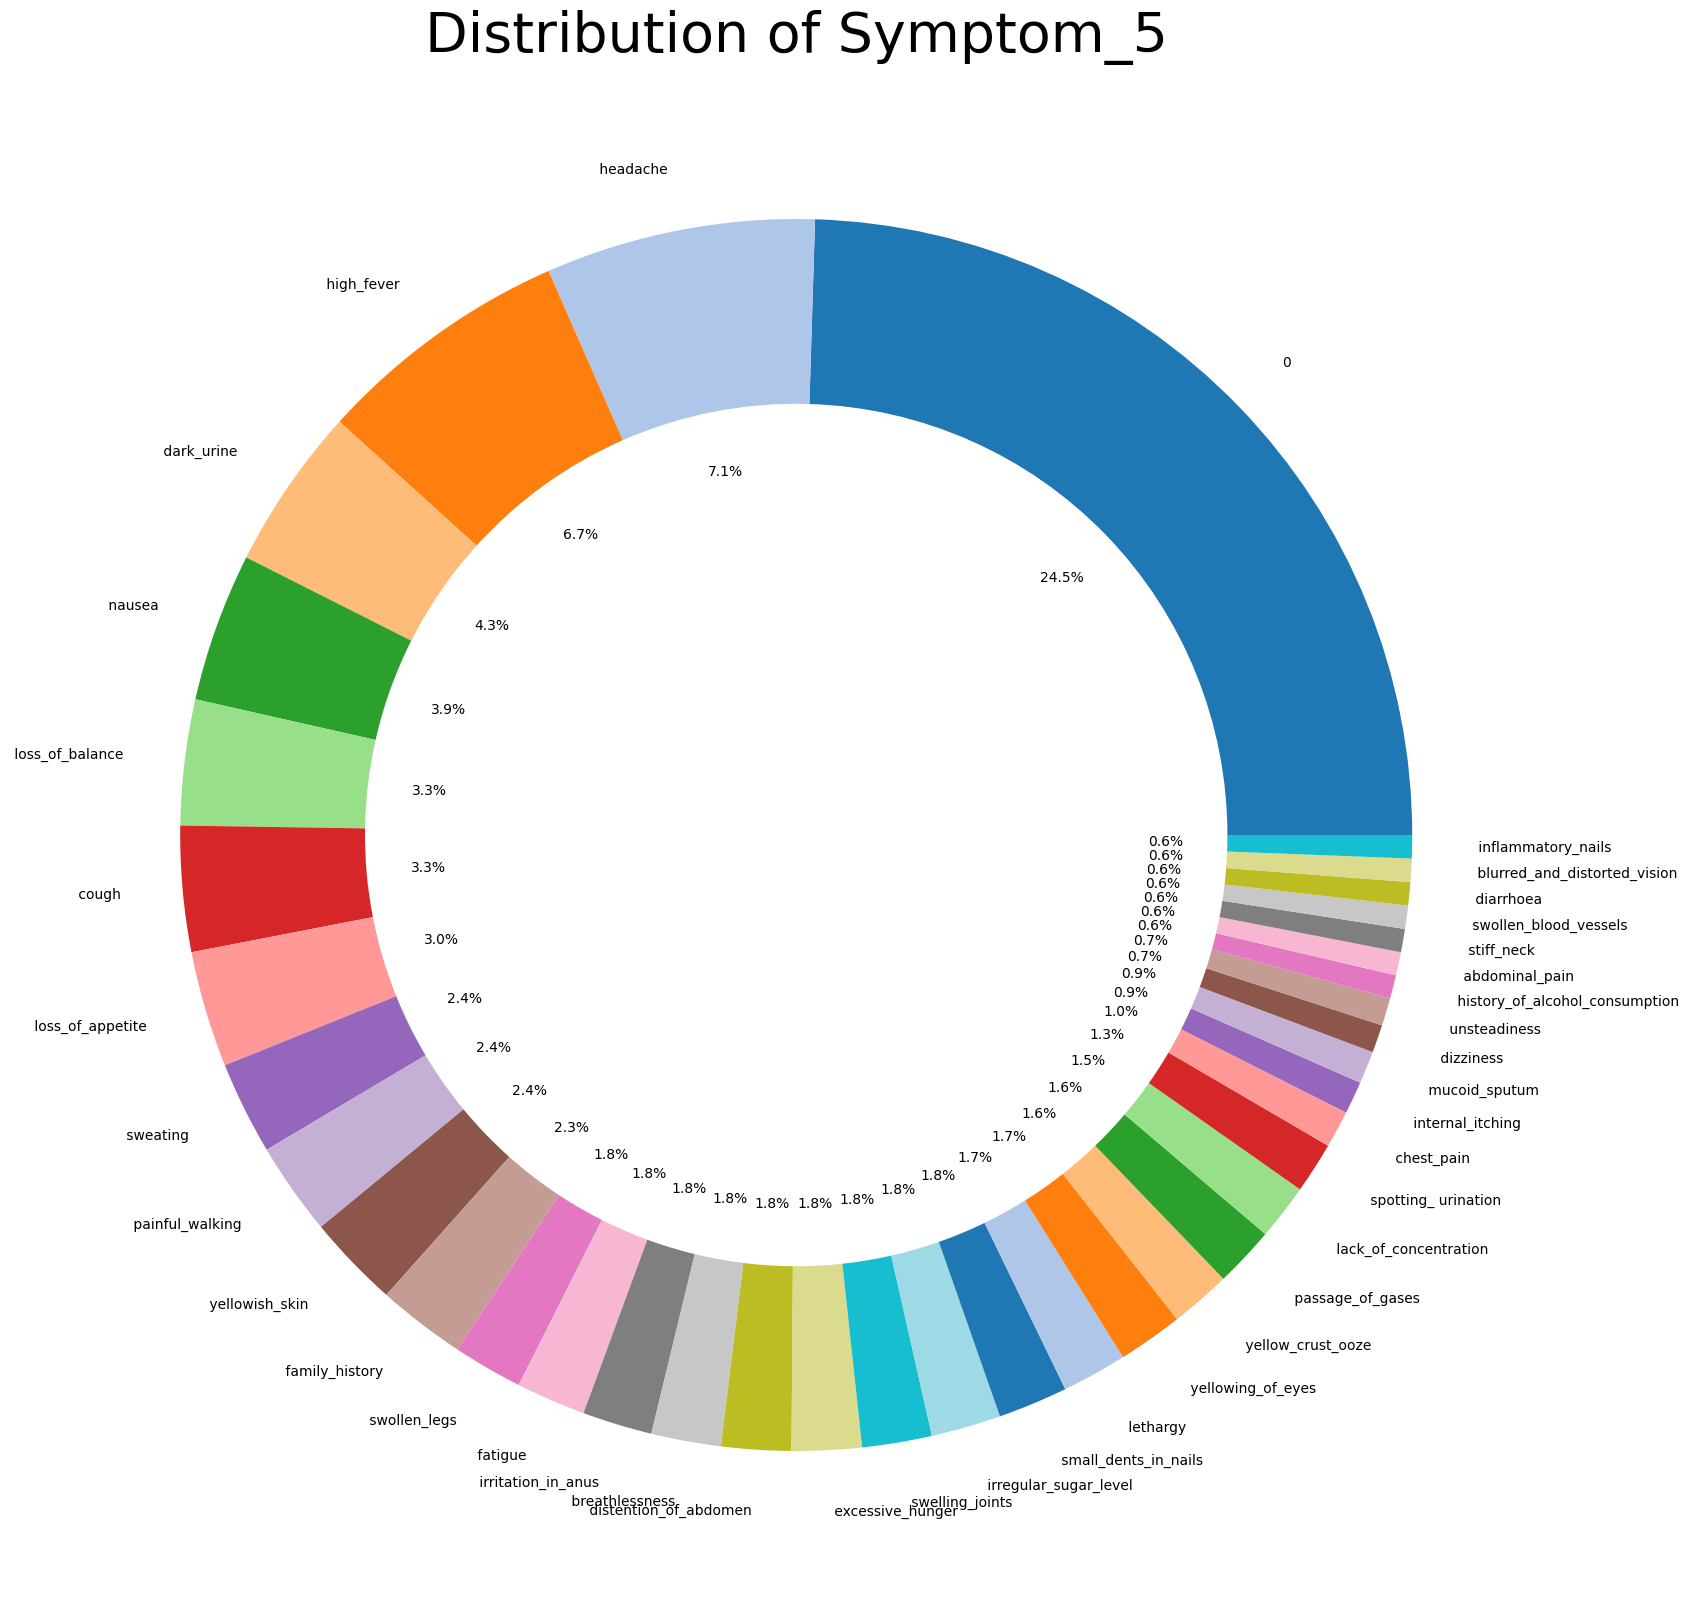

In [24]:
symptom_5_counts = df["Symptom_5"].value_counts()

plt.figure(figsize=(20, 20))
plt.pie(symptom_5_counts, labels=symptom_5_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.tab20.colors[:len(symptom_5_counts)], wedgeprops=dict(width=0.3))
plt.title("Distribution of Symptom_5", fontsize=40)
plt.show()

In [25]:
df["Symptom_6"].value_counts()

Symptom_6
0                                  1986
 nausea                             390
 loss_of_appetite                   240
 headache                           204
 high_fever                         168
 abdominal_pain                     156
 blurred_and_distorted_vision       120
 dark_urine                         120
 diarrhoea                          120
 painful_walking                     84
 sweating                            84
 history_of_alcohol_consumption      84
 inflammatory_nails                  84
 yellowish_skin                      84
 stiff_neck                          84
 unsteadiness                        78
 dizziness                           78
 swollen_blood_vessels               78
 family_history                      78
 mucoid_sputum                       72
 internal_itching                    72
 chest_pain                          66
 prominent_veins_on_calf             42
 puffy_face_and_eyes                 42
 breathlessness               

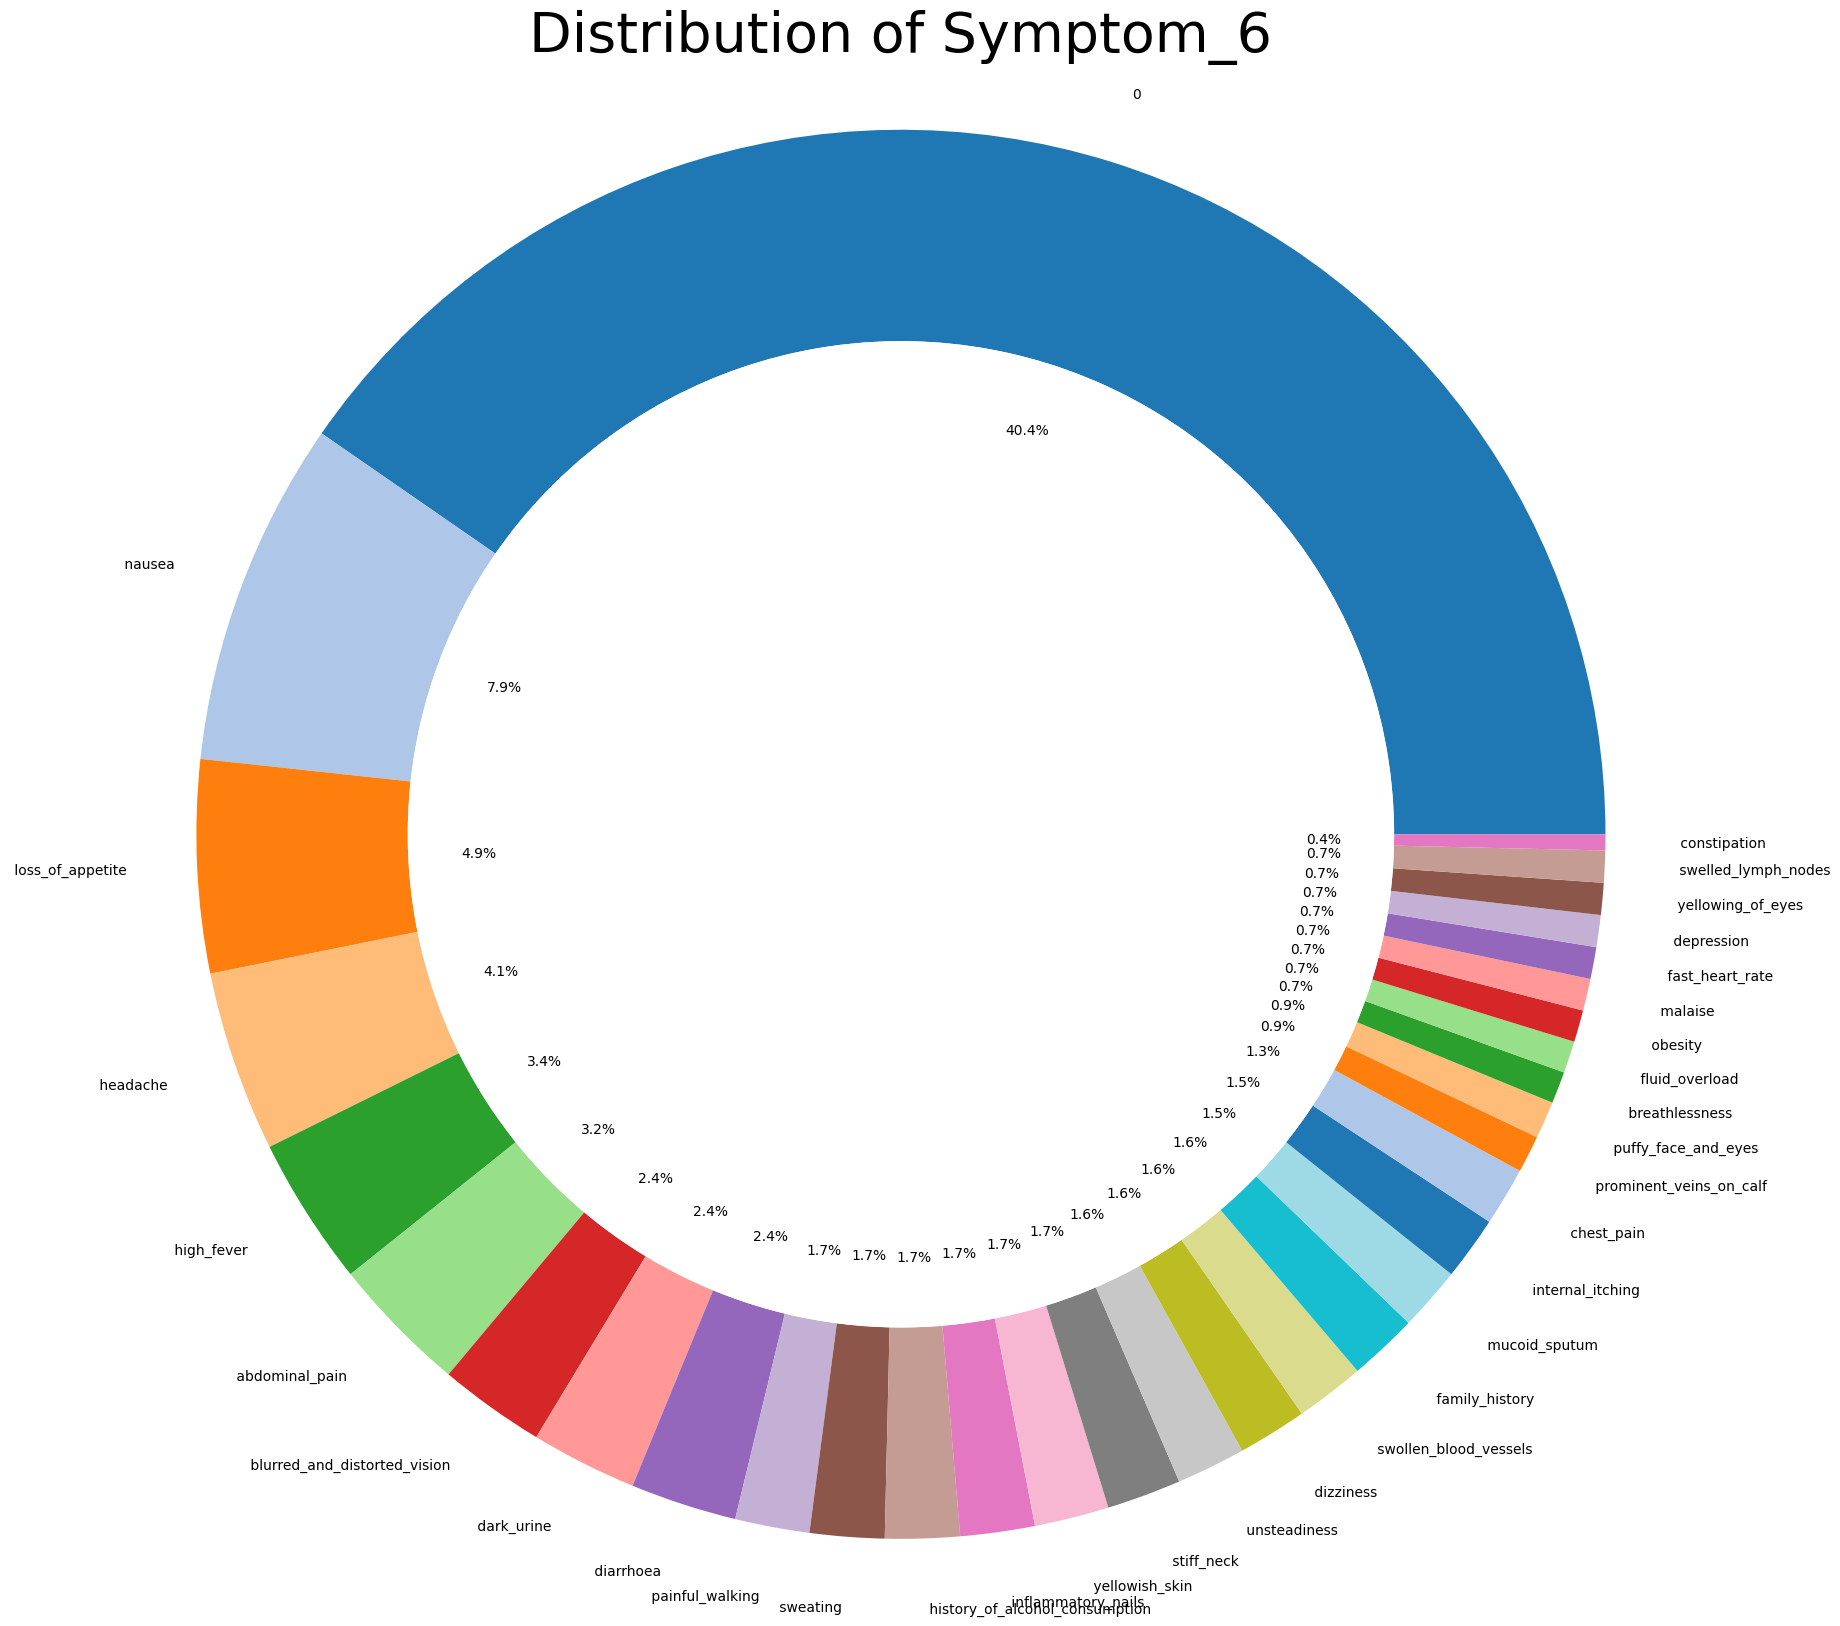

In [26]:
plt.figure(figsize=(20, 20))
symptom_6_counts = df["Symptom_6"].value_counts()
plt.pie(symptom_6_counts, labels=symptom_6_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.tab20.colors[:len(symptom_6_counts)], wedgeprops=dict(width=0.3))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis("equal")
plt.title("Distribution of Symptom_6",fontsize=40)
plt.show()

In [27]:
df["Symptom_7"].value_counts()

Symptom_7
0                                2652
 abdominal_pain                   264
 loss_of_appetite                 198
 excessive_hunger                 126
 malaise                          120
 diarrhoea                        114
 nausea                           114
 constipation                      96
 headache                          84
 dark_urine                        78
 fast_heart_rate                   78
 obesity                           78
 swelled_lymph_nodes               78
 fluid_overload                    78
 breathlessness                    78
 yellowing_of_eyes                 78
 depression                        78
 blurred_and_distorted_vision      78
 prominent_veins_on_calf           72
 puffy_face_and_eyes               72
 muscle_pain                       48
 enlarged_thyroid                  48
 yellow_urine                      42
 sweating                          42
 mild_fever                        42
 phlegm                            42
 i

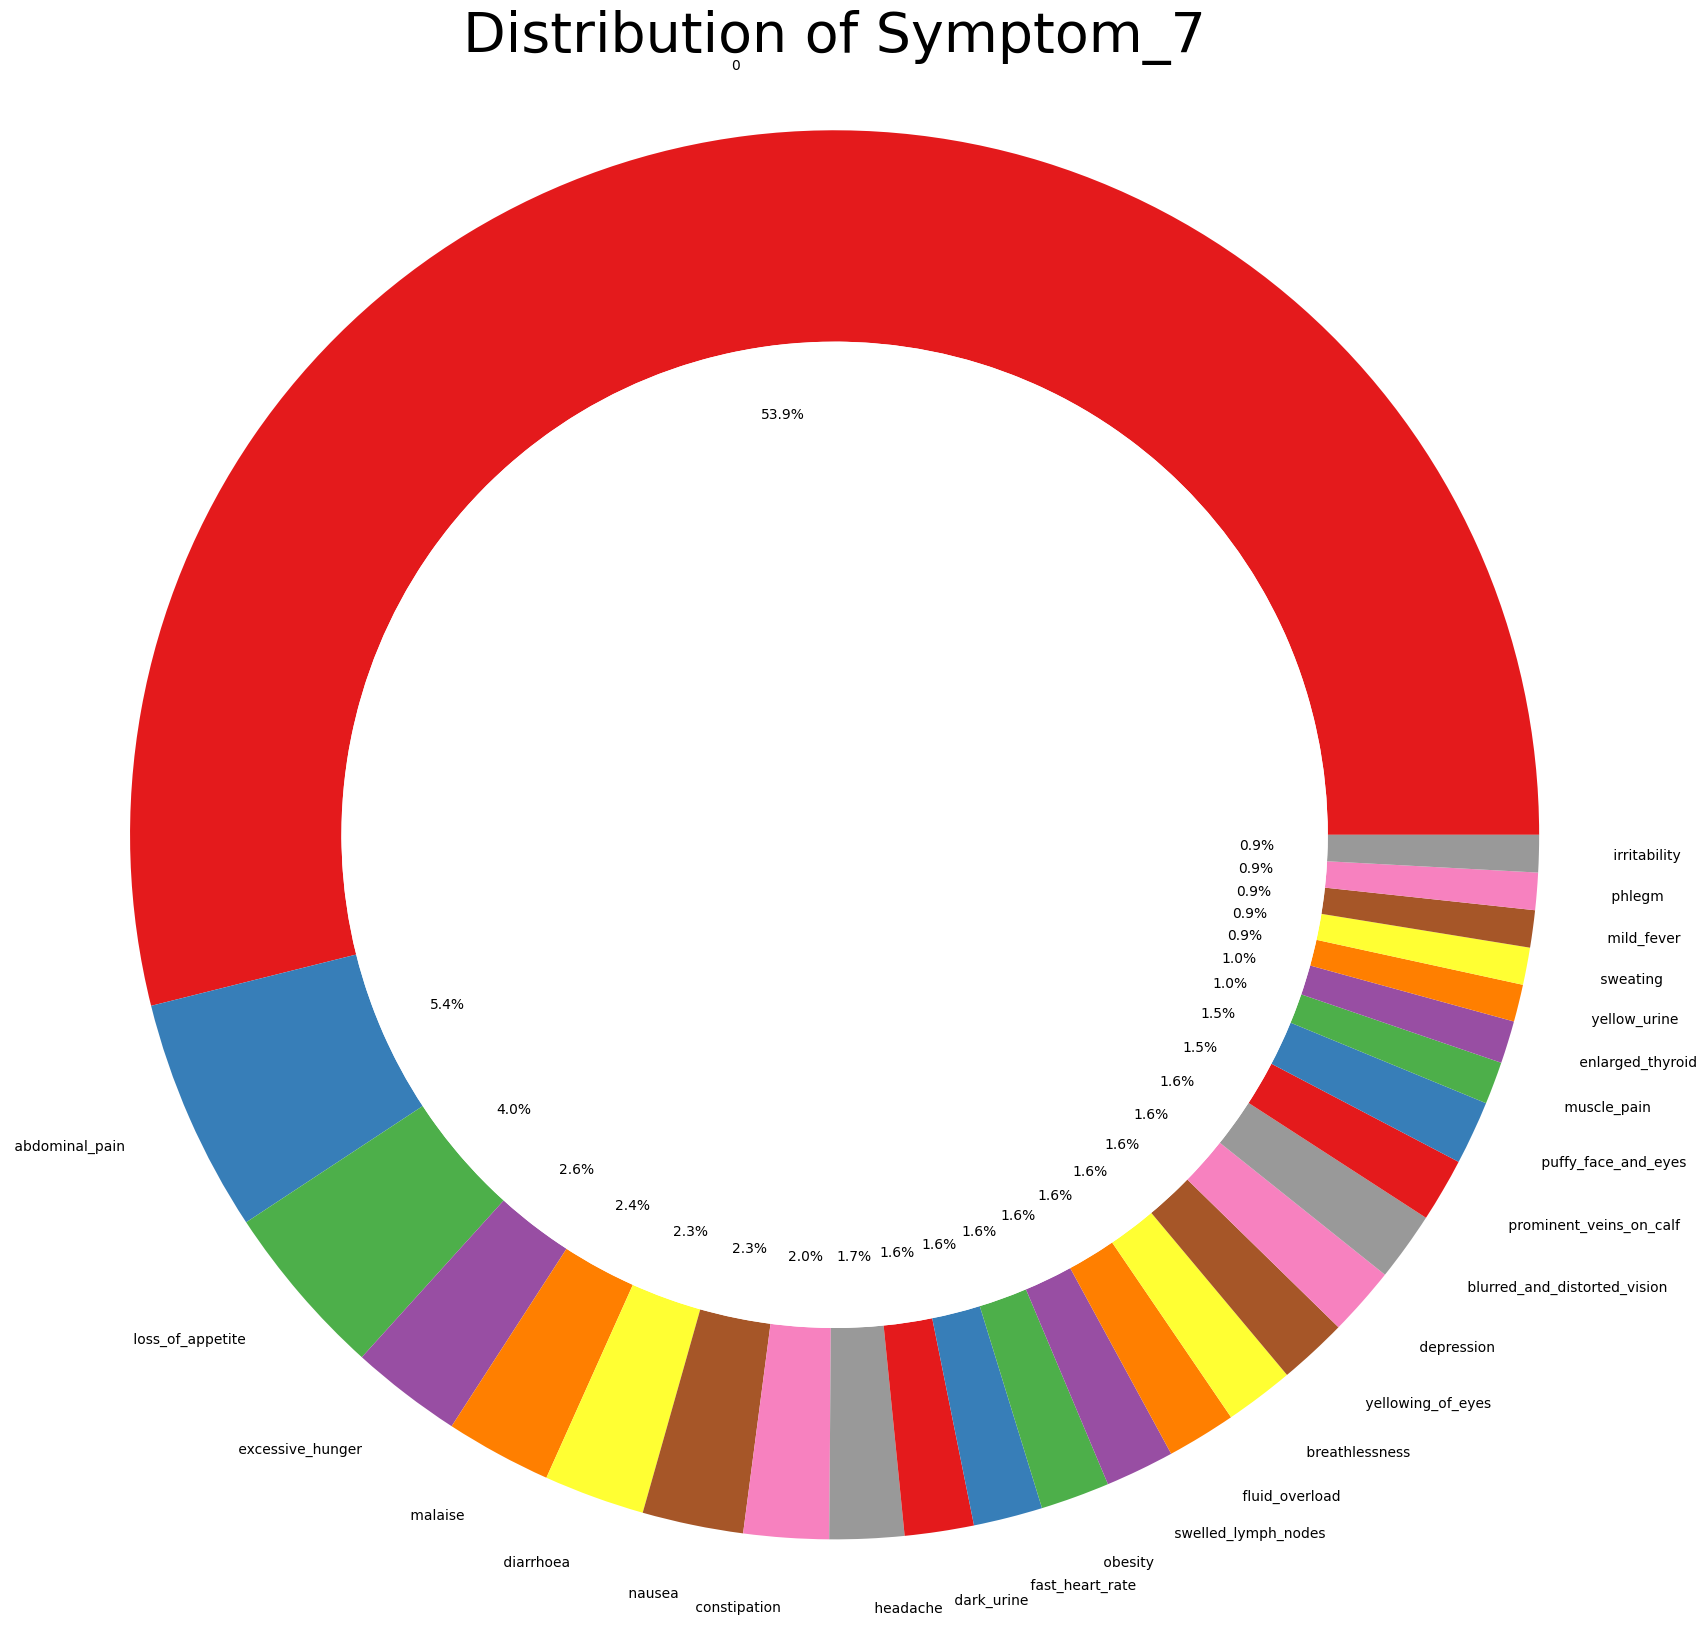

In [28]:
symptom_7_counts = df["Symptom_7"].value_counts()

fig, ax = plt.subplots(figsize=(20,20))

outer_colors = plt.cm.Set1.colors[:len(symptom_7_counts)]
wedges, texts, autotexts = ax.pie(symptom_7_counts, labels=symptom_7_counts.index, autopct='%1.1f%%', 
                                  colors=outer_colors, wedgeprops=dict(width=0.3))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.title("Distribution of Symptom_7",fontsize=40)
plt.show()

In [29]:
df["Symptom_8"].value_counts()

Symptom_8
0                            2976
 abdominal_pain               276
 excessive_hunger             222
 loss_of_appetite             162
 mild_fever                   120
 phlegm                       120
 diarrhoea                    102
 yellowing_of_eyes             96
 nausea                        84
 muscle_pain                   72
 irritability                  72
 yellow_urine                  72
 sweating                      72
 malaise                       72
 enlarged_thyroid              72
 swelled_lymph_nodes           48
 visual_disturbances           48
 increased_appetite            48
 chest_pain                    48
 brittle_nails                 48
 muscle_weakness               48
 drying_and_tingling_lips      42
Name: count, dtype: int64

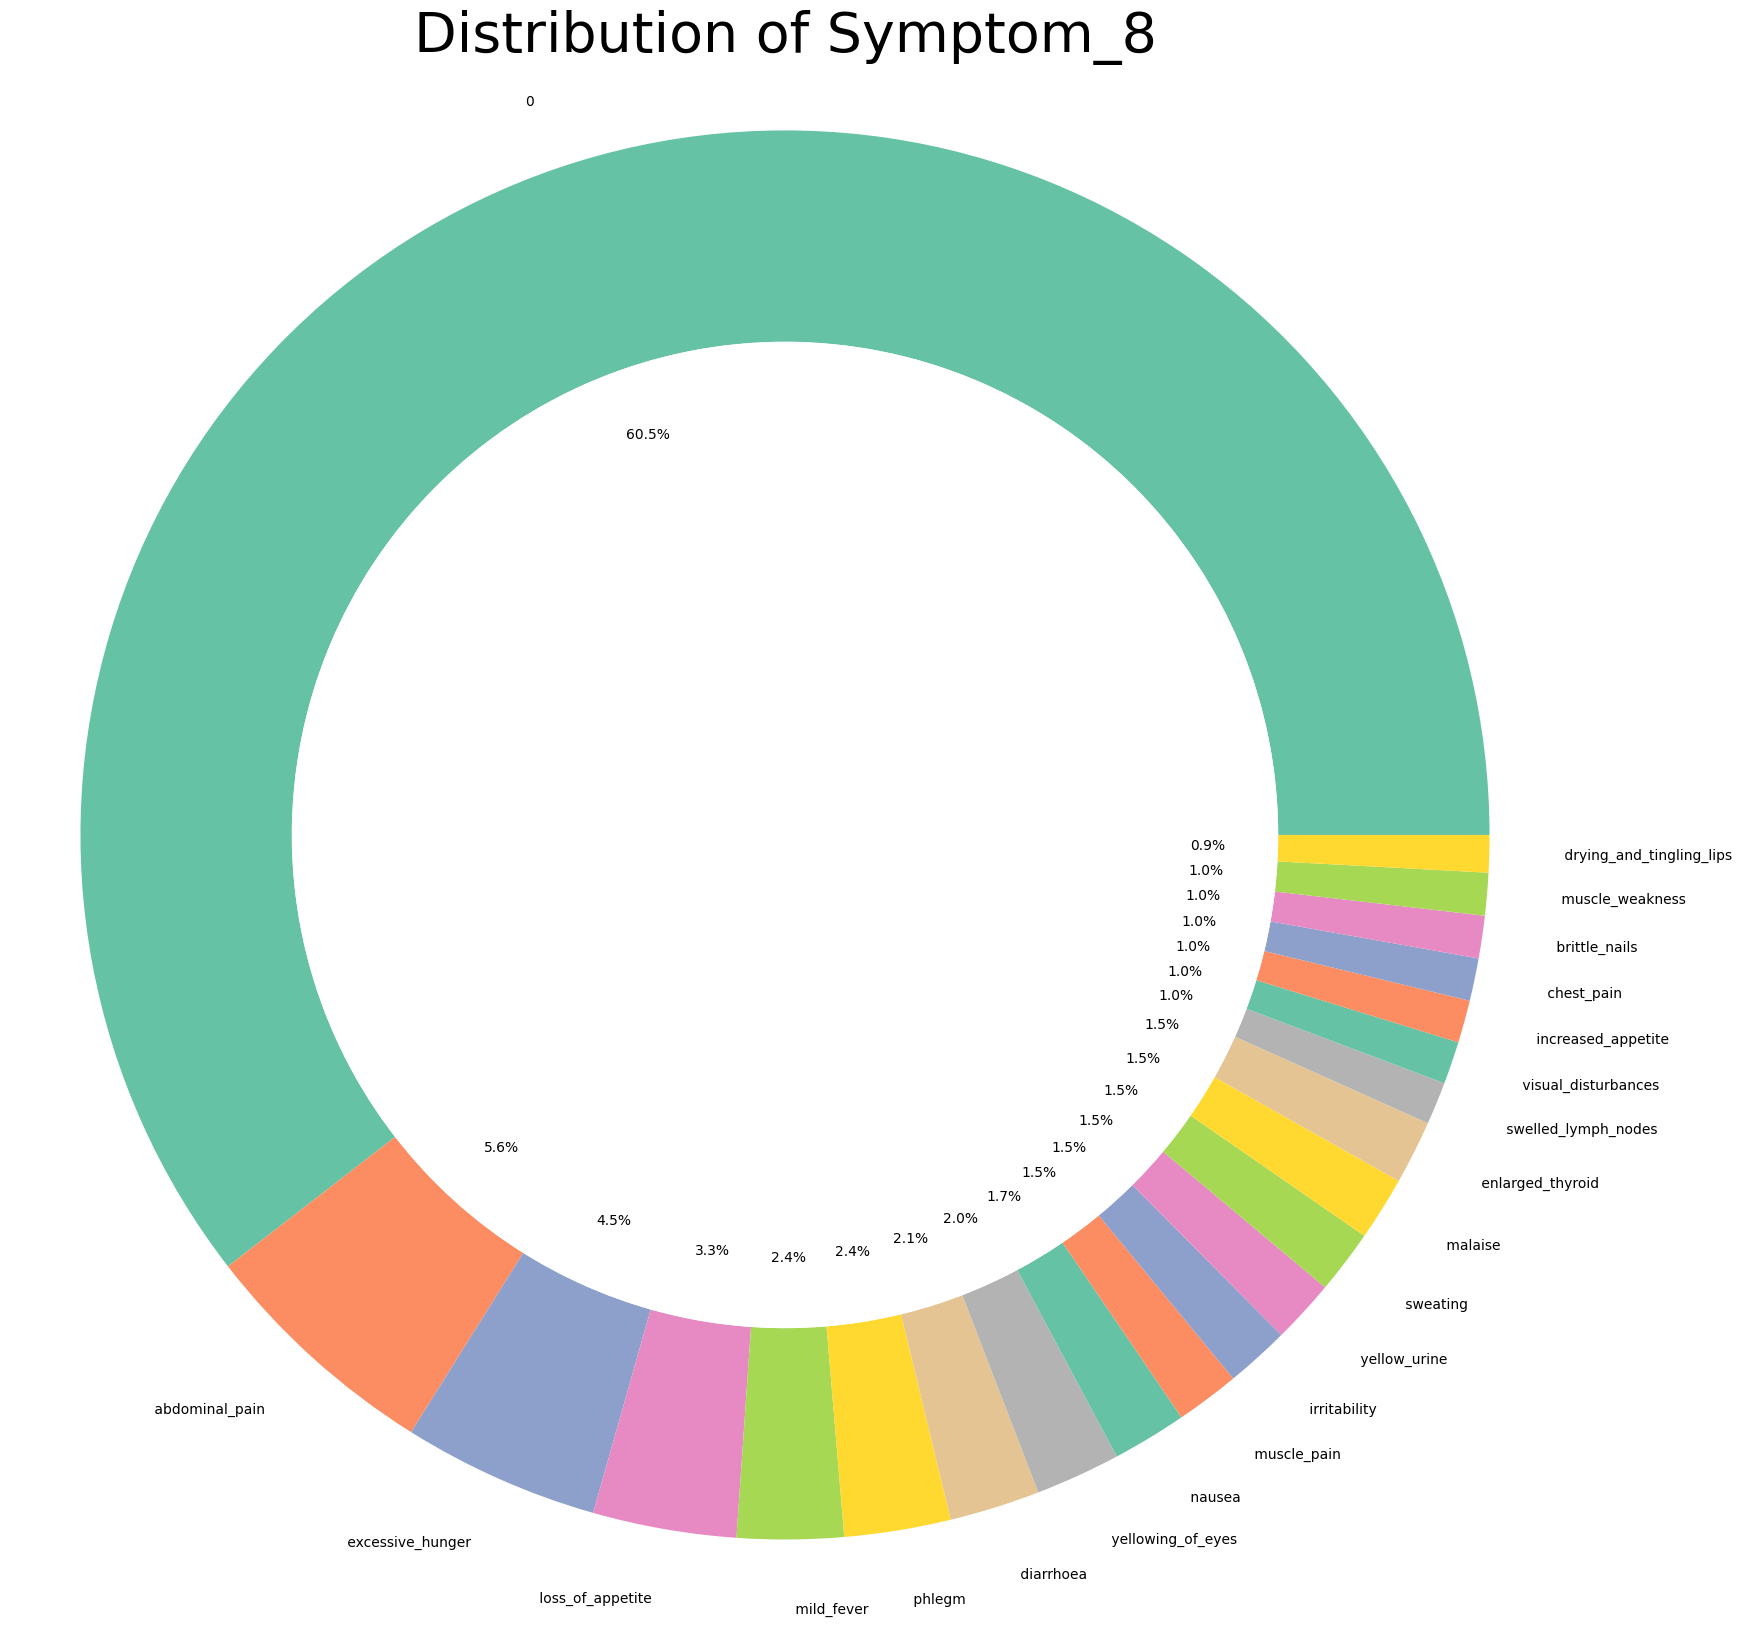

In [30]:
symptom_8_counts = df["Symptom_8"].value_counts()

plt.figure(figsize=(20,20))
colors = plt.cm.Set2.colors[:len(symptom_8_counts)]
plt.pie(symptom_8_counts, labels=symptom_8_counts.index, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.3))
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title("Distribution of Symptom_8",fontsize=40)
plt.show()

In [31]:
df["Symptom_9"].value_counts()

Symptom_9
0                            3228
 yellowing_of_eyes            228
 loss_of_appetite             156
 mild_fever                   120
 malaise                      102
 diarrhoea                     84
 abdominal_pain                78
 phlegm                        72
 muscle_weakness               72
 brittle_nails                 72
 chest_pain                    72
 drying_and_tingling_lips      72
 increased_appetite            72
 visual_disturbances           66
 swelled_lymph_nodes           66
 throat_irritation             48
 fast_heart_rate               48
 swollen_extremeties           48
 irritability                  48
 slurred_speech                48
 polyuria                      48
 toxic_look_(typhos)           36
 pain_behind_the_eyes          36
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11704\658116605.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Symptom_9", data=df, palette="Dark2")


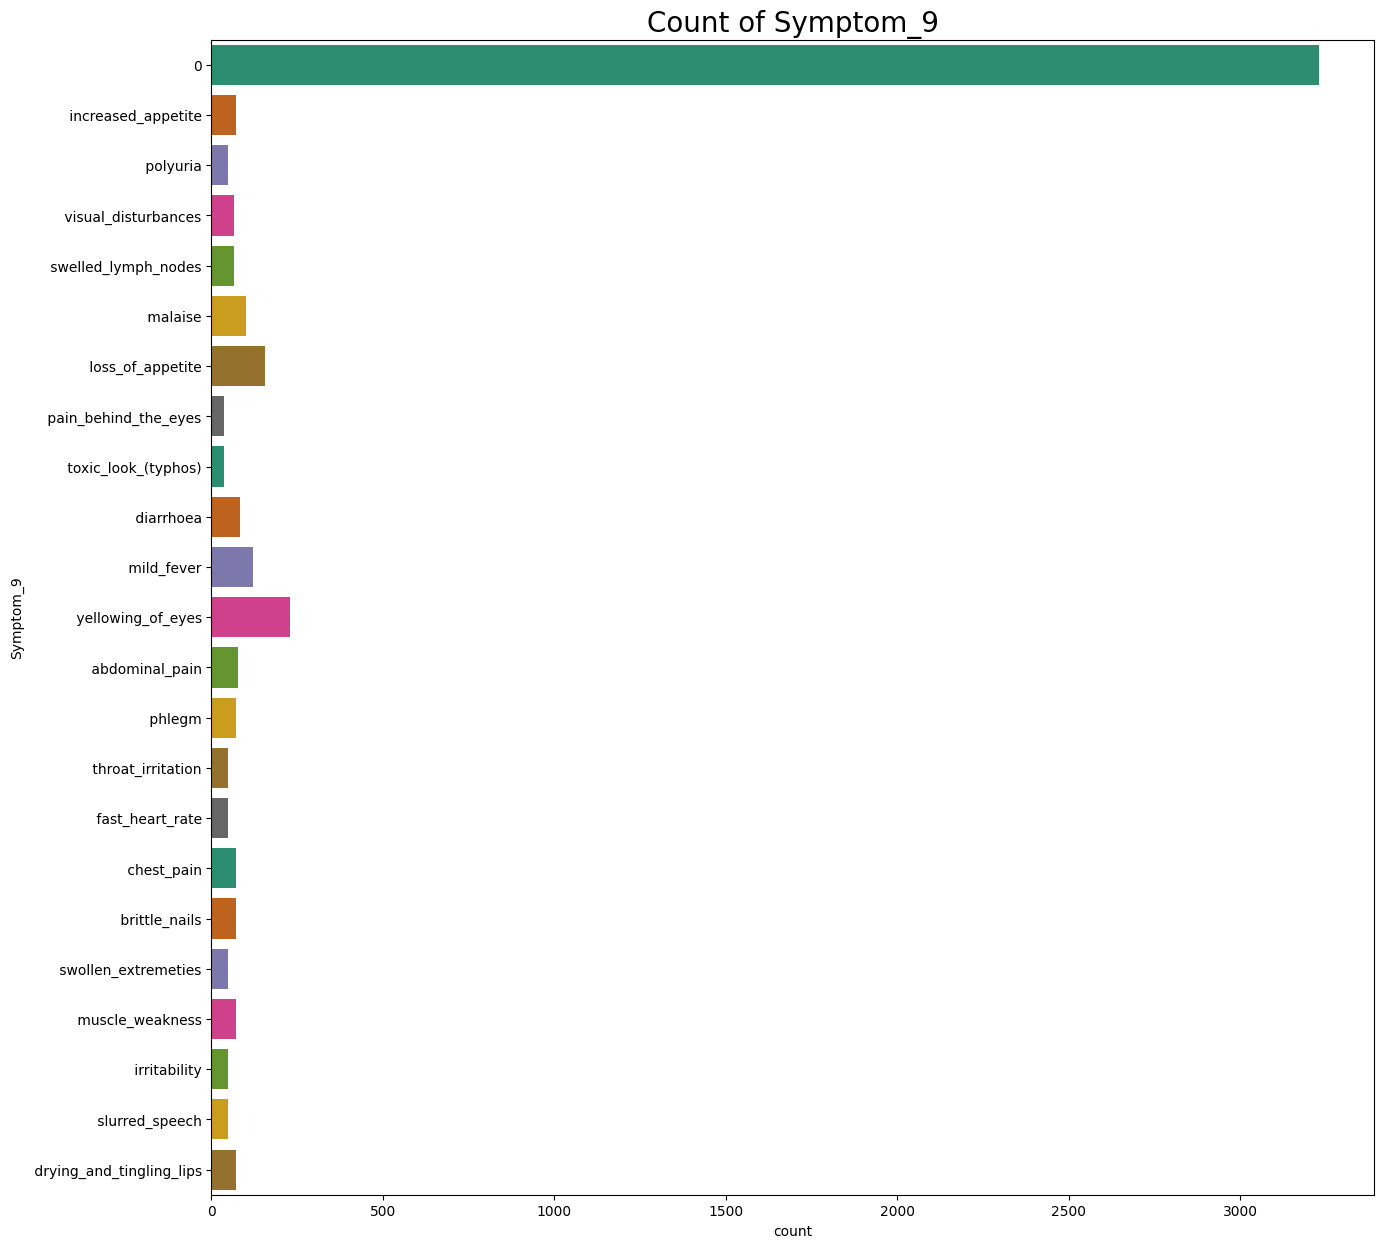

In [32]:
plt.figure(figsize=(15,15))

sns.countplot(y="Symptom_9", data=df, palette="Dark2")
plt.title("Count of Symptom_9", fontsize=20)
plt.show()

In [33]:
df["Symptom_10"].value_counts()

Symptom_10
0                               3408
 yellowing_of_eyes               198
 malaise                         138
 irritability                    120
 pain_behind_the_eyes             84
 toxic_look_(typhos)              78
 polyuria                         72
 swollen_extremeties              72
 fast_heart_rate                  72
 throat_irritation                72
 mild_fever                       72
 slurred_speech                   72
 red_spots_over_body              54
 receiving_blood_transfusion      48
 muscle_pain                      48
 redness_of_eyes                  48
 rusty_sputum                     48
 depression                       48
 abnormal_menstruation            48
 belly_pain                       42
 acute_liver_failure              42
 back_pain                        36
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11704\3234512757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Symptom_10", data=df, palette="Set3")


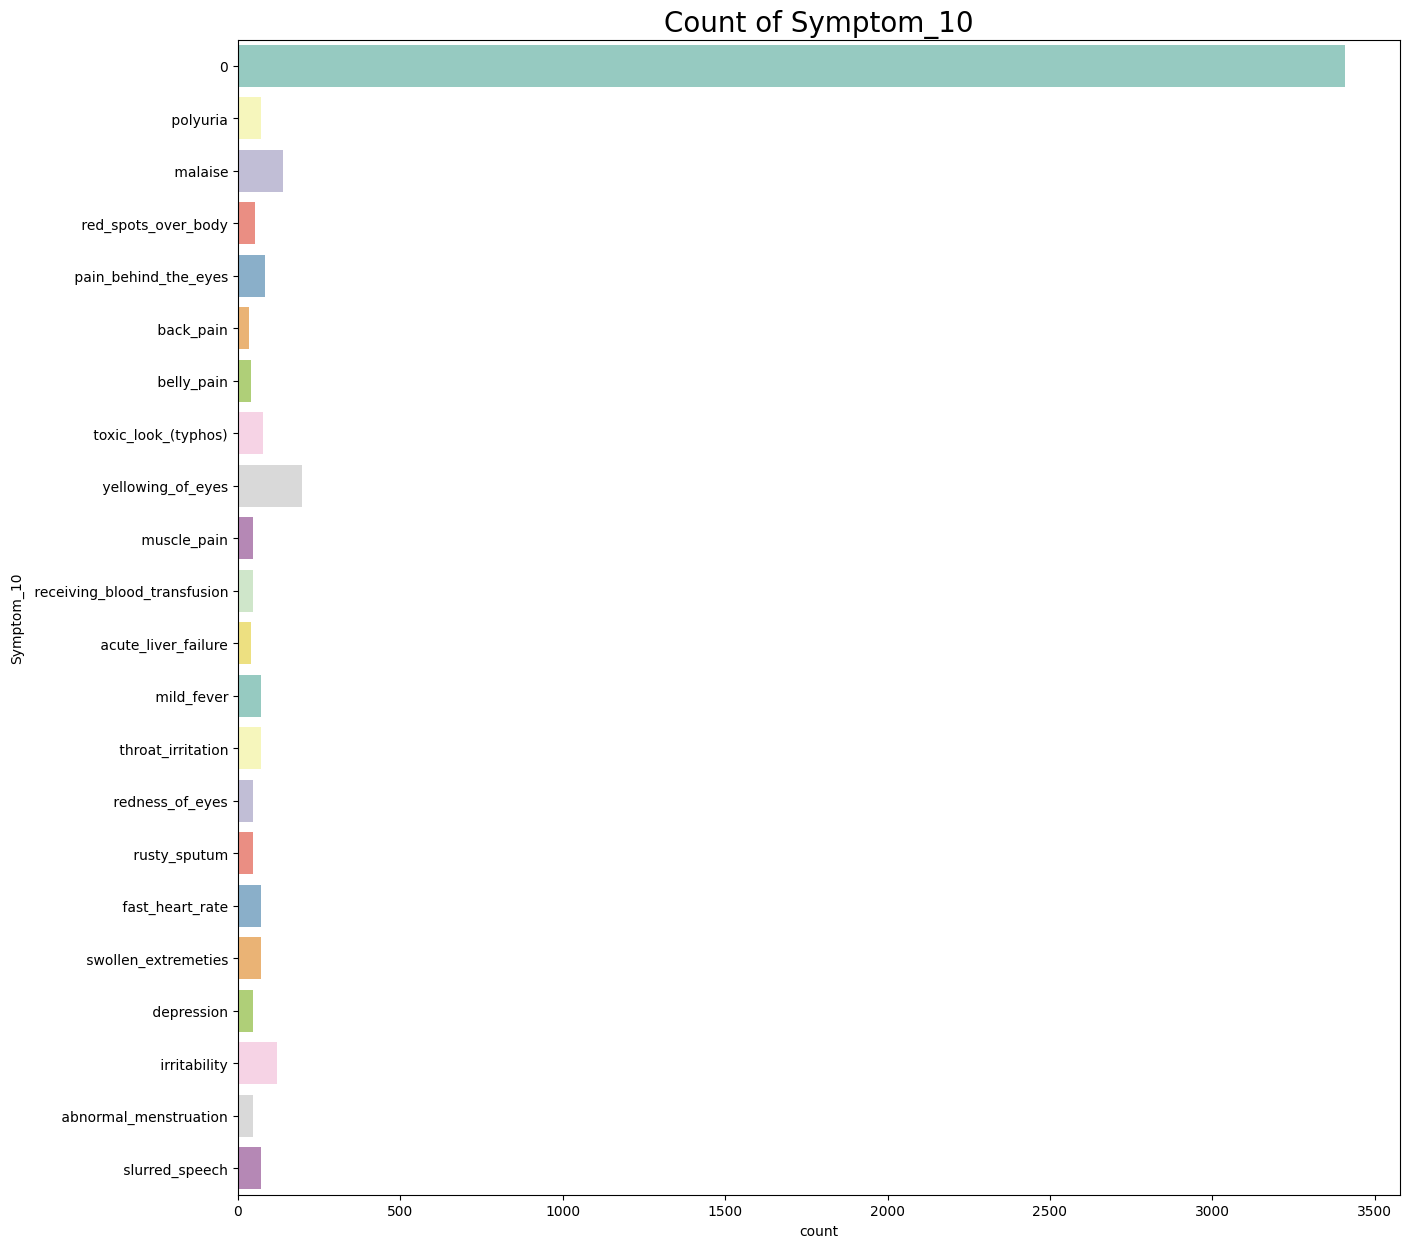

In [34]:
plt.figure(figsize=(15,15))
sns.countplot(y="Symptom_10", data=df, palette="Set3")
plt.title("Count of Symptom_10", fontsize=20)
plt.show()

In [35]:
df["Symptom_11"].value_counts()

Symptom_11
0                                  3726
 irritability                       120
 back_pain                           84
 yellowing_of_eyes                   72
 abnormal_menstruation               72
 depression                          72
 rusty_sputum                        72
 redness_of_eyes                     72
 acute_liver_failure                 72
 receiving_blood_transfusion         72
 muscle_pain                         72
 belly_pain                          72
 red_spots_over_body                 66
 coma                                48
 swelled_lymph_nodes                 48
 receiving_unsterile_injections      48
 sinus_pressure                      48
 palpitations                        48
 malaise                             36
Name: count, dtype: int64

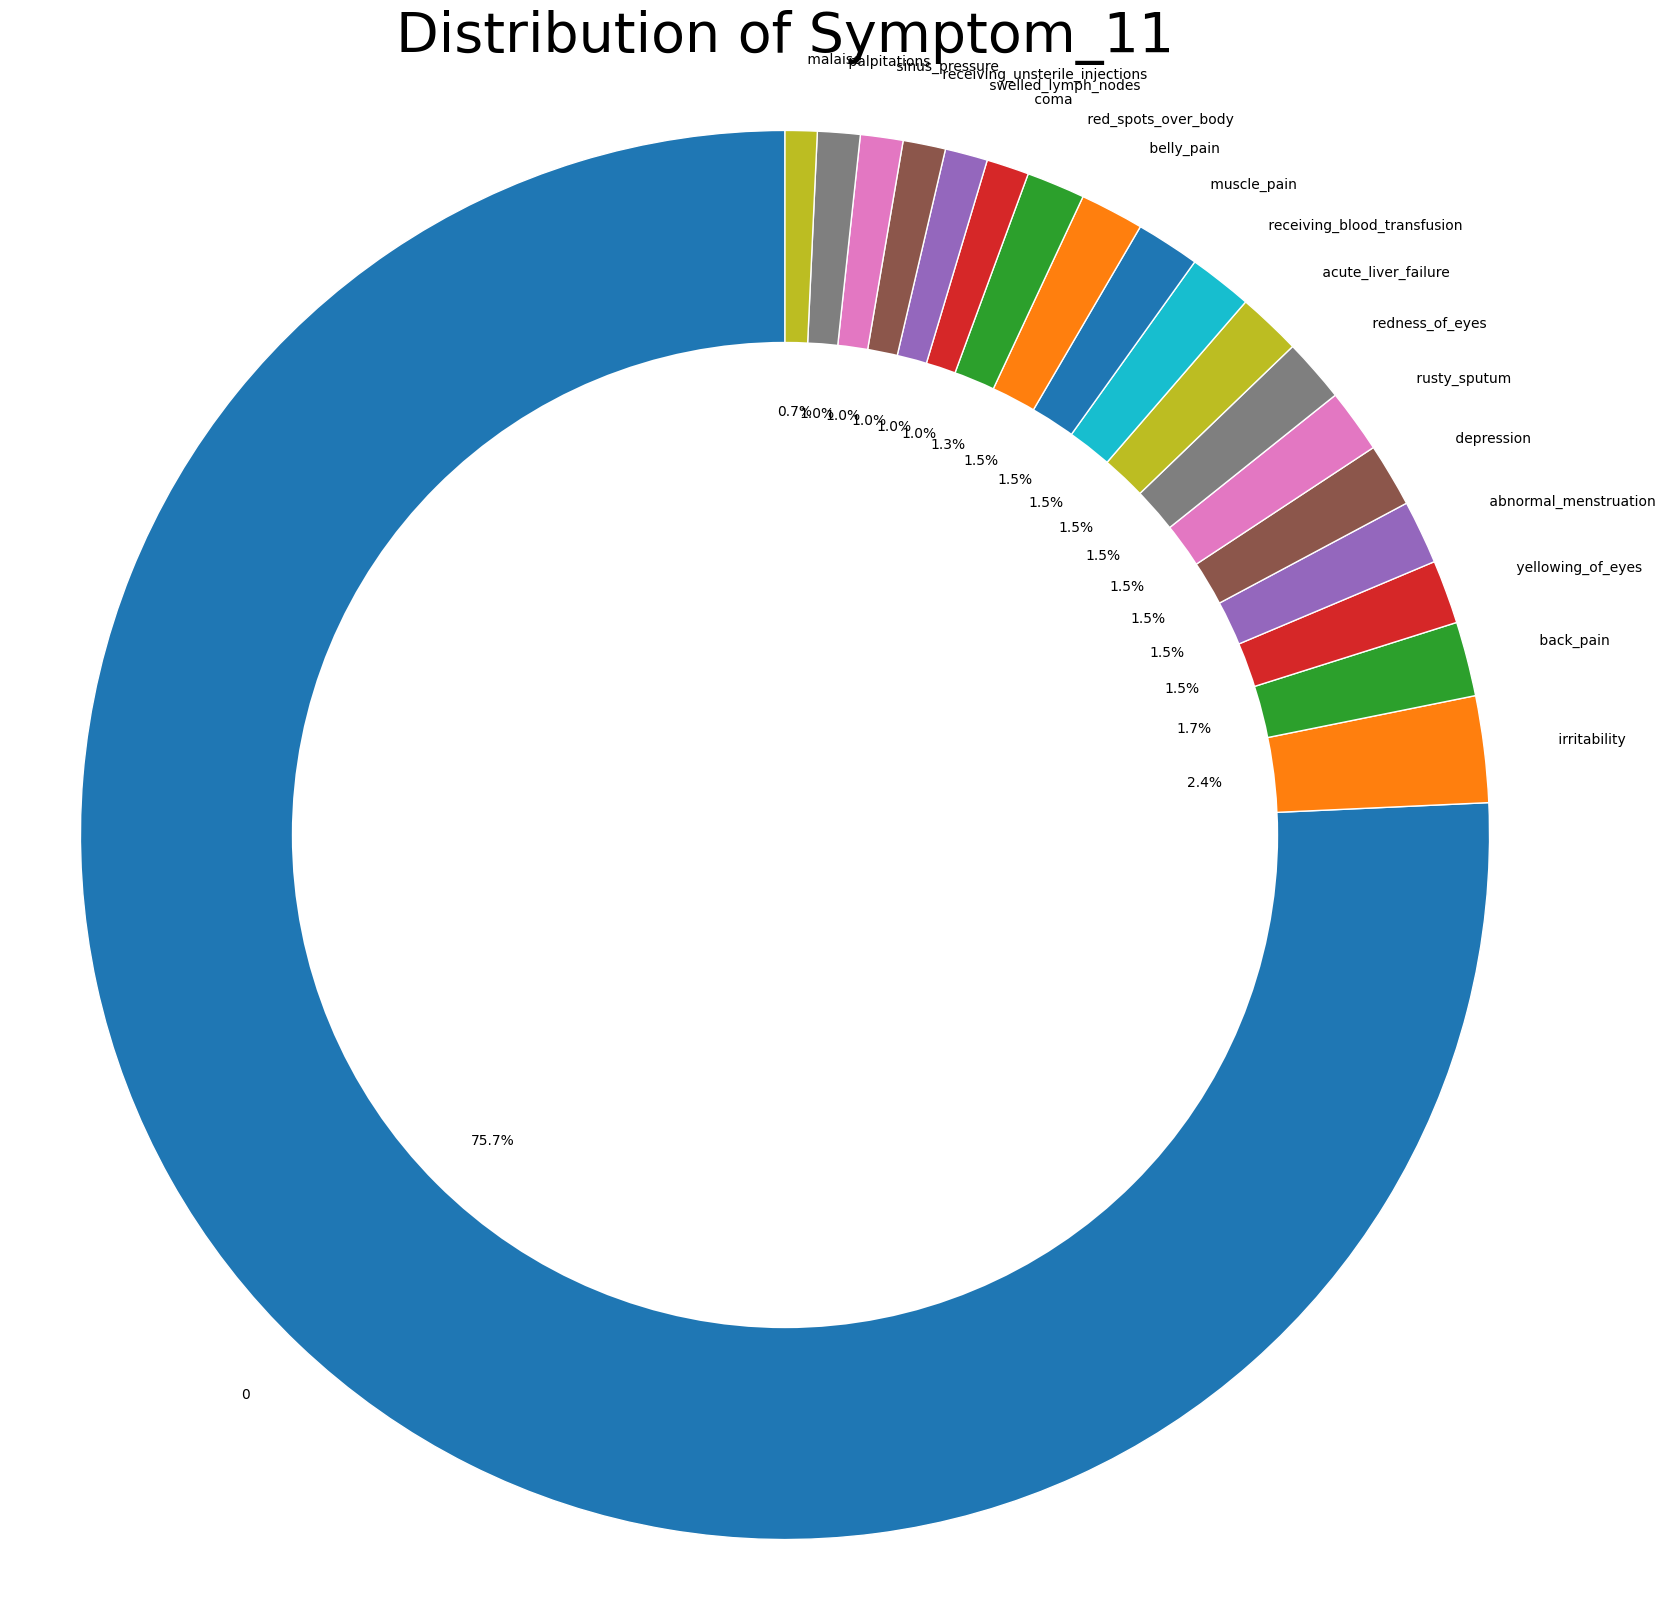

In [36]:
value_counts = df["Symptom_11"].value_counts()

fig, ax = plt.subplots(figsize=(20,20))
ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')  

plt.title('Distribution of Symptom_11',fontsize=40)
plt.show()

In [37]:
df["Symptom_12"].value_counts()

Symptom_12
0                                  4176
 malaise                            126
 receiving_unsterile_injections      72
 coma                                72
 swelled_lymph_nodes                 72
 sinus_pressure                      72
 irritability                        72
 palpitations                        72
 stomach_bleeding                    48
 runny_nose                          48
 abnormal_menstruation               48
 muscle_pain                         42
Name: count, dtype: int64

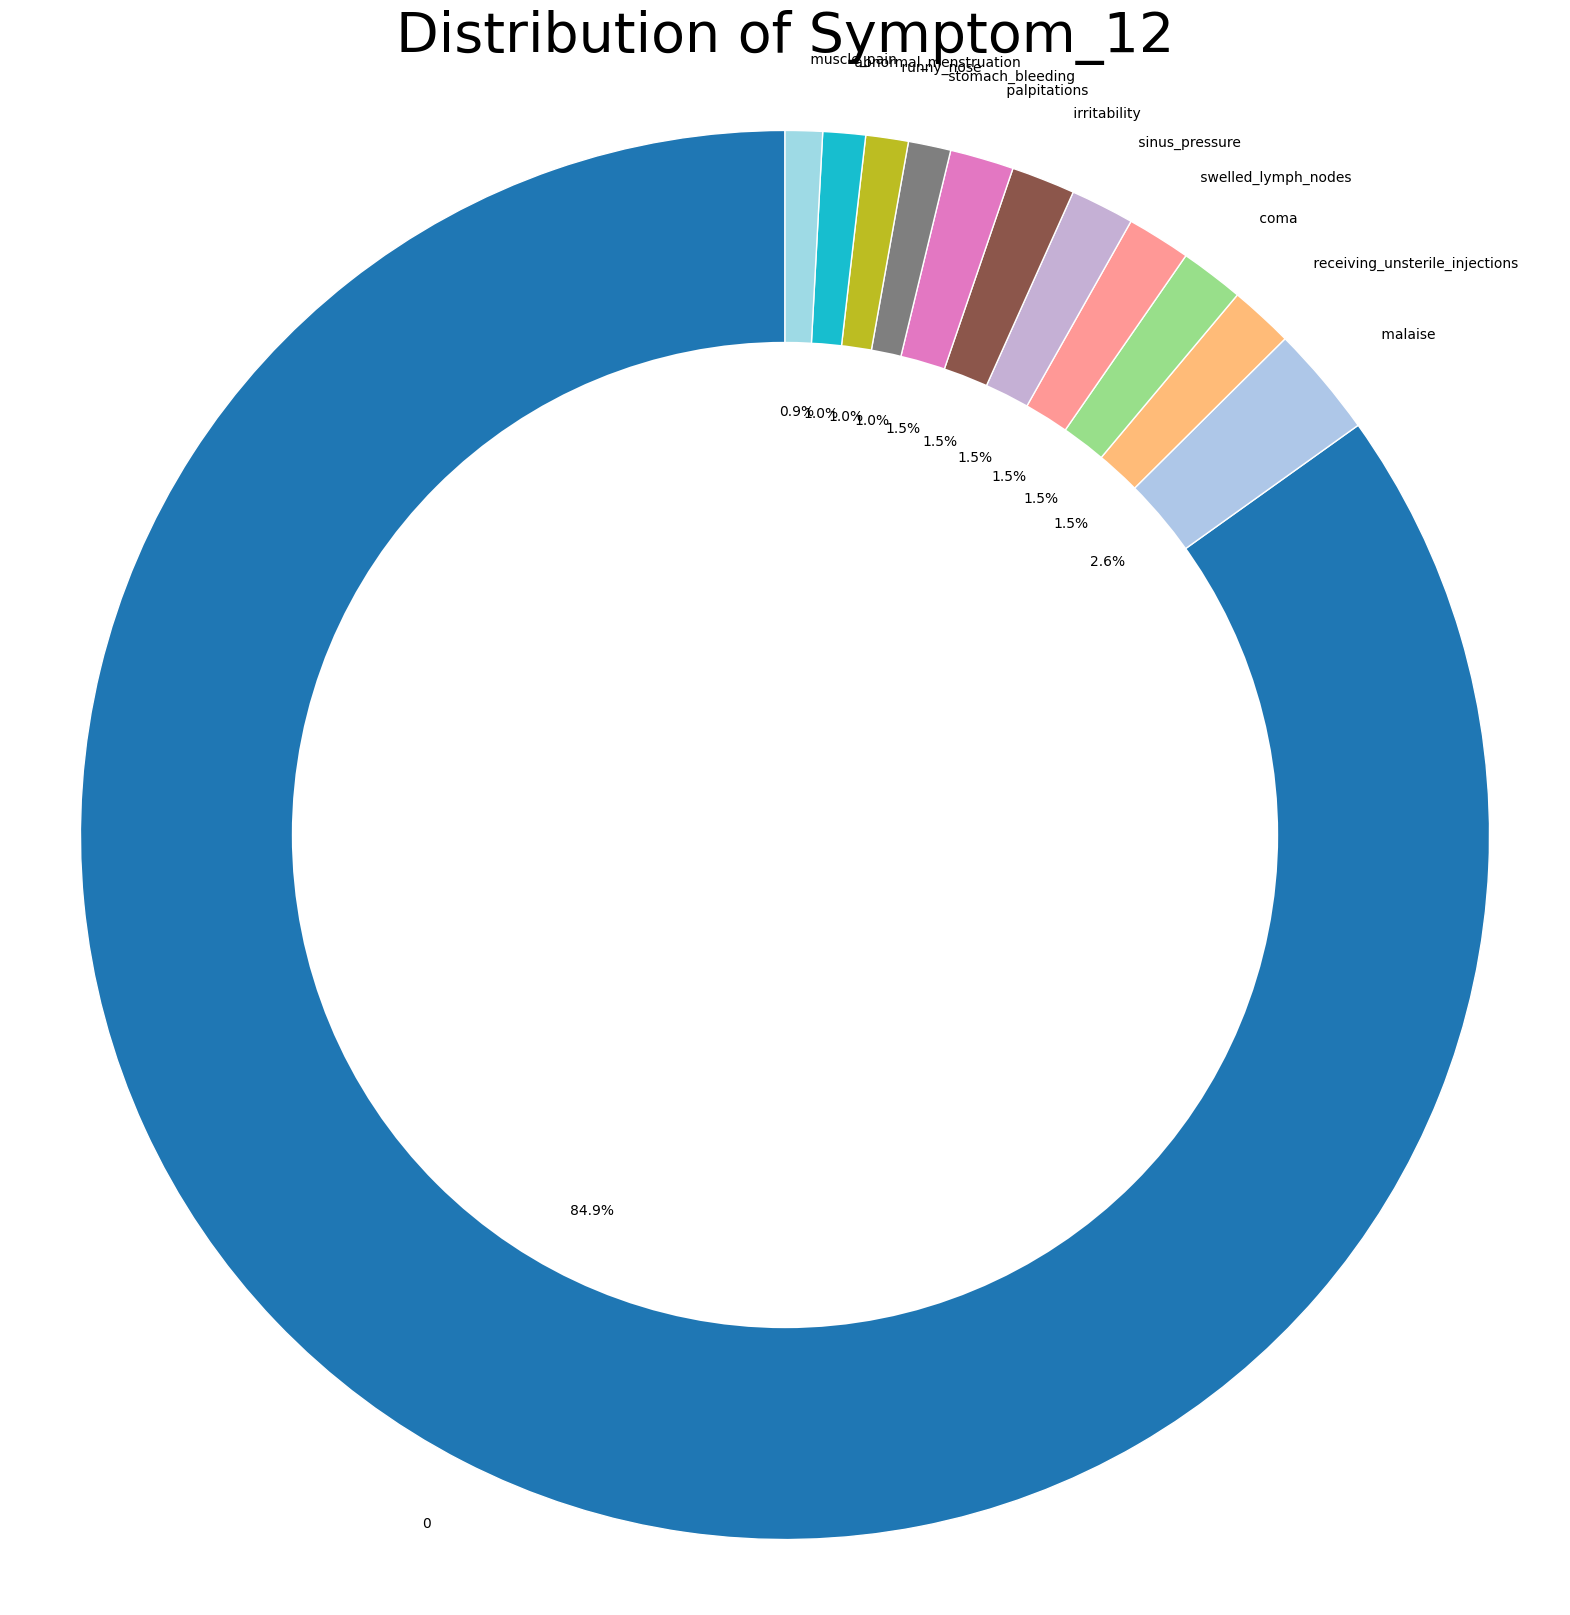

In [38]:
import numpy as np

value_counts = df["Symptom_12"].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(value_counts)))

fig, ax = plt.subplots(figsize=(20,20))
ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')  

plt.title('Distribution of Symptom_12',fontsize=40)
plt.show()

In [39]:
df1=pd.read_csv("../data/Symptom-severity.csv")
df1.head()

Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5

In [40]:
z=df1["Symptom"]

In [41]:
df1["Symptom"].value_counts()

Symptom
fluid_overload          2
itching                 1
spinning_movements      1
muscle_pain             1
irritability            1
                       ..
constipation            1
back_pain               1
pain_behind_the_eyes    1
loss_of_appetite        1
prognosis               1
Name: count, Length: 132, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11704\2162059260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Symptom", data=df1, palette="Dark2")


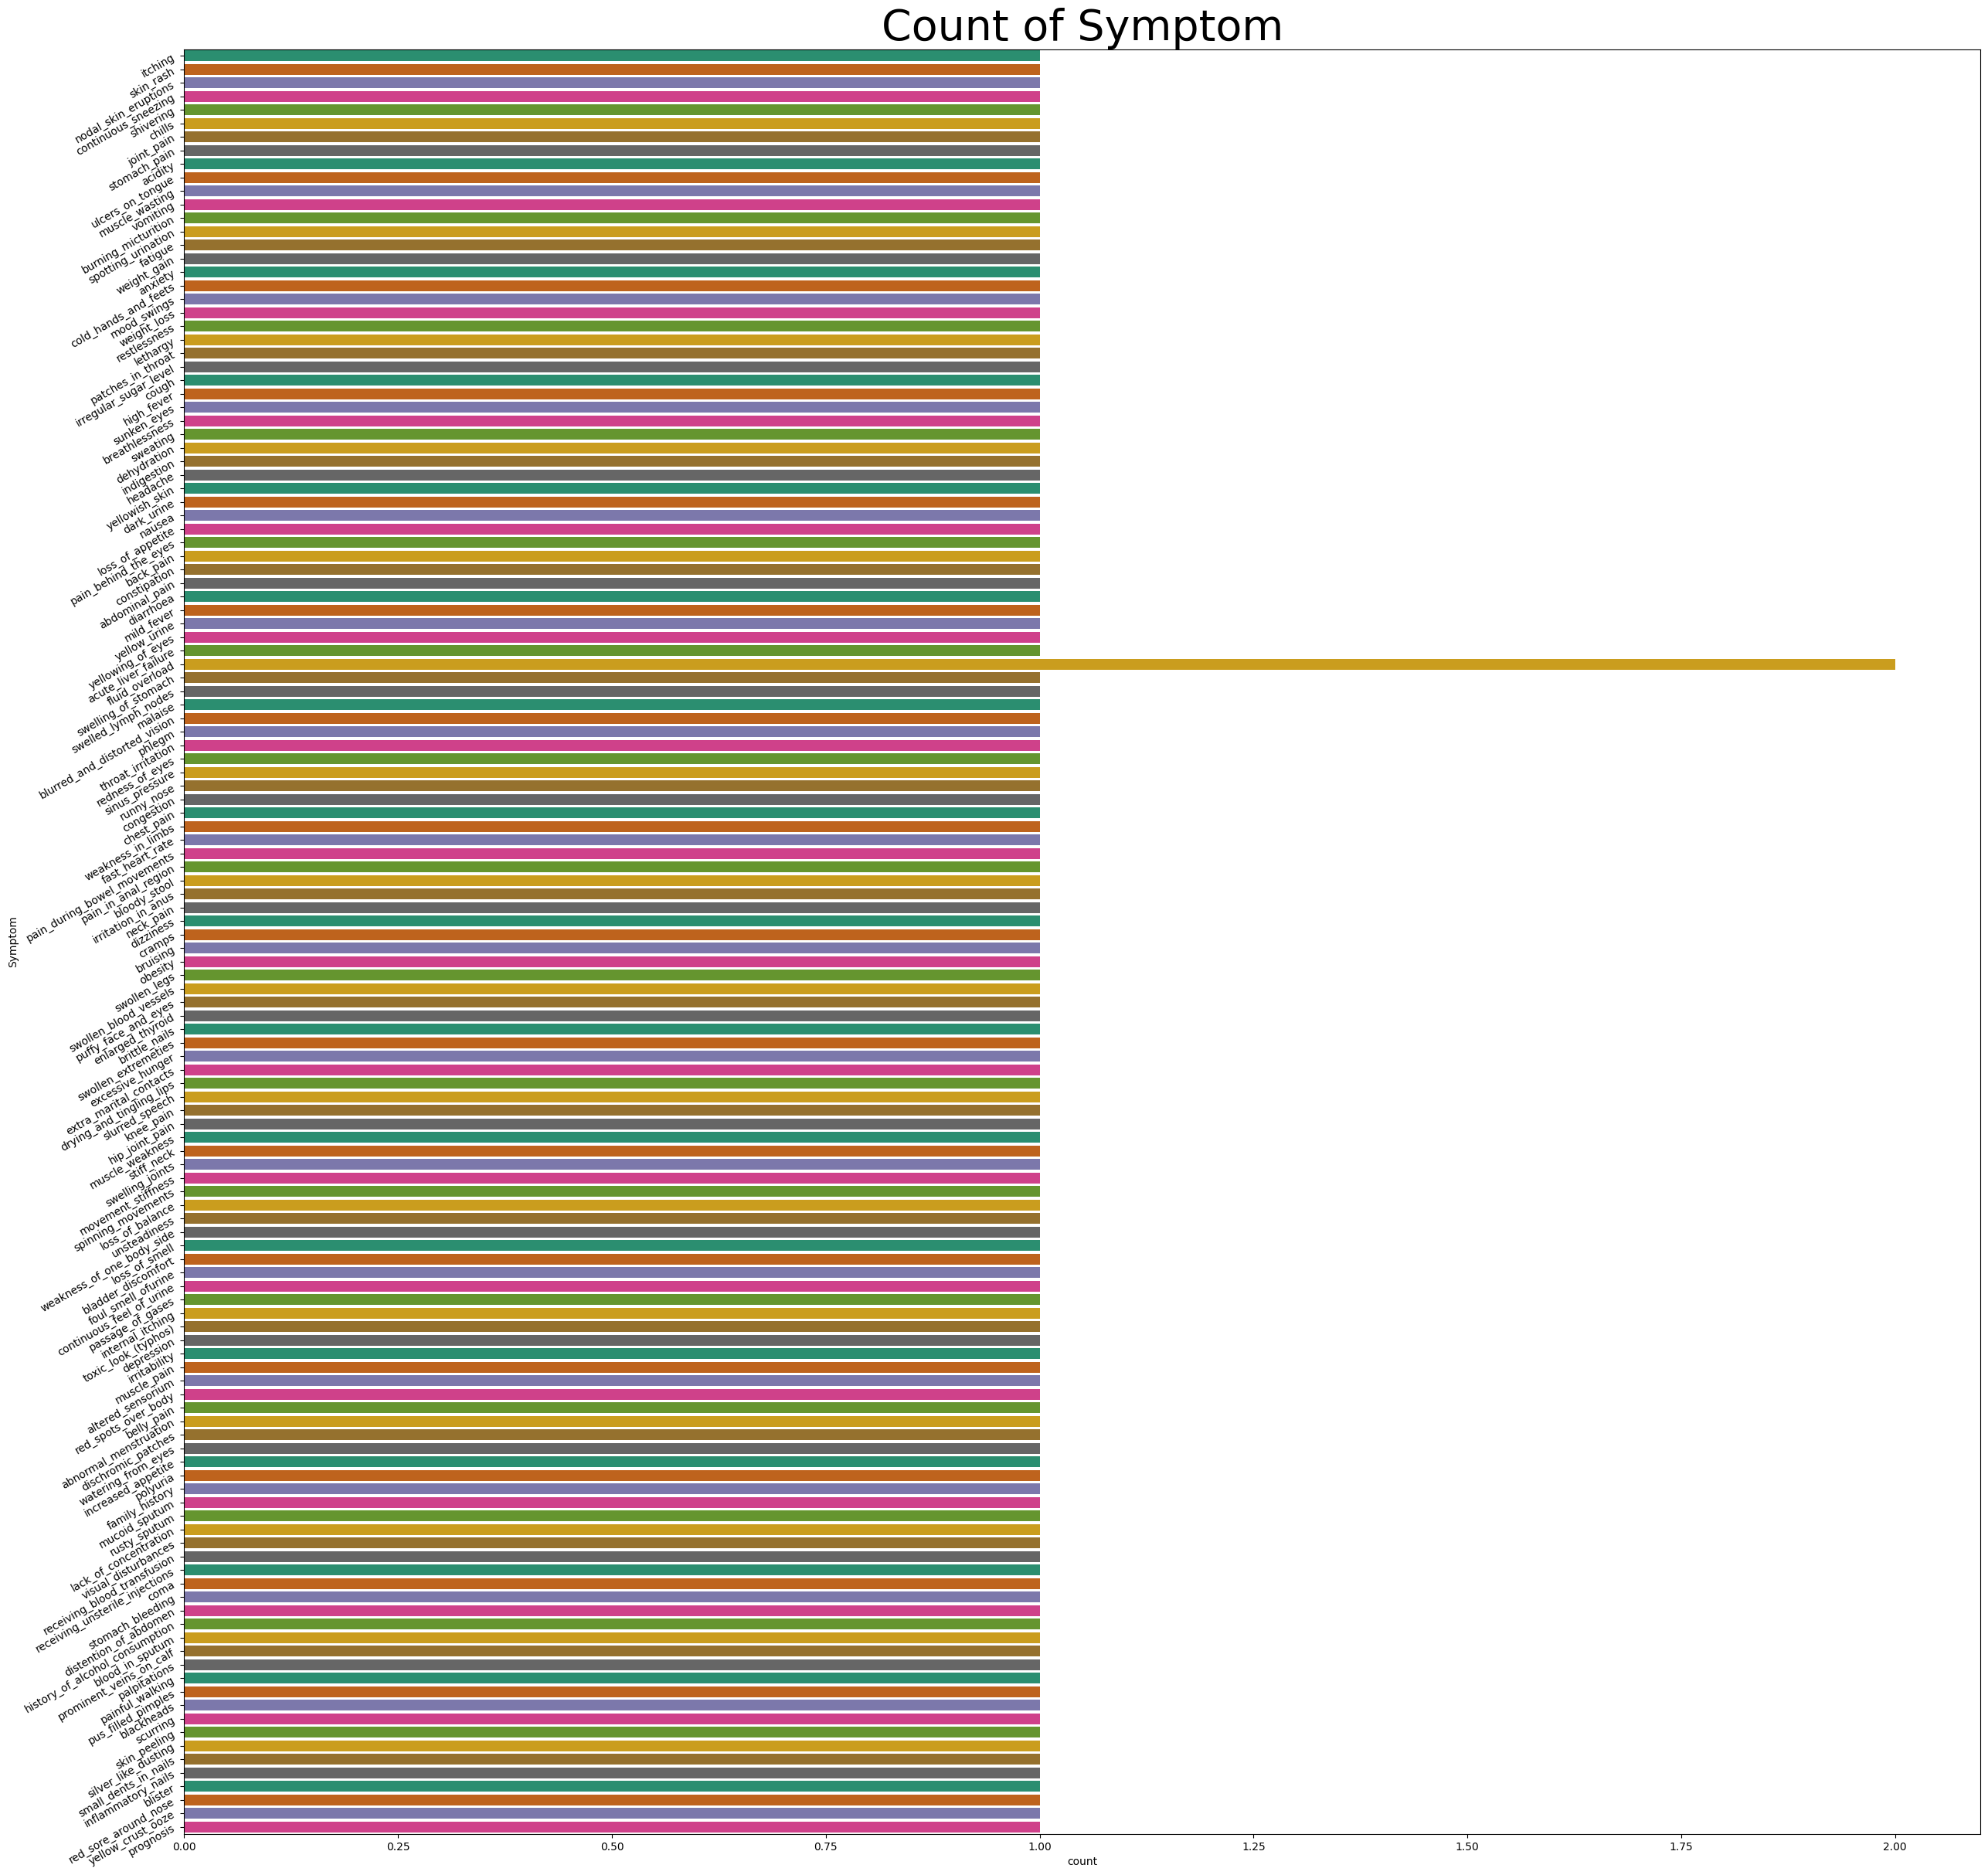

In [42]:
plt.figure(figsize=(30,30))

sns.countplot(y="Symptom", data=df1, palette="Dark2")
plt.title("Count of Symptom", fontsize=40)
plt.yticks(rotation=30)
plt.show()

In [43]:
dfx=pd.DataFrame()
dfx["Disease"]=df["Disease"]
dfx

Disease
0                            Fungal infection
1                            Fungal infection
2                            Fungal infection
3                            Fungal infection
4                            Fungal infection
...                                       ...
4915  (vertigo) Paroymsal  Positional Vertigo
4916                                     Acne
4917                  Urinary tract infection
4918                                Psoriasis
4919                                 Impetigo

[4920 rows x 1 columns]

In [44]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
dfx=pd.DataFrame()
dfx["Disease"]=df["Disease"]
y=0
dfx[z]=0
for index, row in df.iterrows():
    for symptom in df.columns[1:]:
        if row[symptom] != 0:
            dfx.loc[index, row[symptom]] = 1
dfx = dfx.fillna(0)
dfx[dfx.columns[1:]]=dfx[dfx.columns[1:]].astype('int')

In [46]:
dfx.head()

Disease  itching  skin_rash  nodal_skin_eruptions  \
0  Fungal infection        1          0                     0   
1  Fungal infection        0          0                     0   
2  Fungal infection        1          0                     0   
3  Fungal infection        1          0                     0   
4  Fungal infection        1          0                     0   

   continuous_sneezing  shivering  chills  joint_pain  stomach_pain  acidity  \
0                    0          0       0           0             0        0   
1                    0          0       0           0             0        0   
2                    0          0       0           0             0        0   
3                    0          0       0           0             0        0   
4                    0          0       0           0             0        0   

   ...   bladder_discomfort   foul_smell_of urine   continuous_feel_of_urine  \
0  ...                    0                     0                          0   
1  ...                    0                     0                          0   
2  ...                    0                     0                          0   
3  ...                    0                     0                          0   
4  ...                    0                     0                          0   

    skin_peeling   silver_like_dusting   small_dents_in_nails  \
0              0                     0                      0   
1              0                     0                      0   
2              0                     0                      0   
3              0                     0                      0   
4              0                     0                      0   

    inflammatory_nails   blister   red_sore_around_nose   yellow_crust_ooze  
0                    0         0                      0                   0  
1                    0         0                      0                   0  
2                    0         0                      0                   0  
3                    0         0                      0                   0  
4                    0         0                      0                   0  

[5 rows x 263 columns]

In [47]:
dfx.shape

(4920, 263)

In [48]:
dfx.isnull().sum()

Disease                  0
itching                  0
skin_rash                0
nodal_skin_eruptions     0
continuous_sneezing      0
                        ..
 small_dents_in_nails    0
 inflammatory_nails      0
 blister                 0
 red_sore_around_nose    0
 yellow_crust_ooze       0
Length: 263, dtype: int64

In [49]:
dfx.columns

Index(['Disease', 'itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity',
       ...
       ' bladder_discomfort', ' foul_smell_of urine',
       ' continuous_feel_of_urine', ' skin_peeling', ' silver_like_dusting',
       ' small_dents_in_nails', ' inflammatory_nails', ' blister',
       ' red_sore_around_nose', ' yellow_crust_ooze'],
      dtype='object', length=263)

In [50]:
dfx.head()

Disease  itching  skin_rash  nodal_skin_eruptions  \
0  Fungal infection        1          0                     0   
1  Fungal infection        0          0                     0   
2  Fungal infection        1          0                     0   
3  Fungal infection        1          0                     0   
4  Fungal infection        1          0                     0   

   continuous_sneezing  shivering  chills  joint_pain  stomach_pain  acidity  \
0                    0          0       0           0             0        0   
1                    0          0       0           0             0        0   
2                    0          0       0           0             0        0   
3                    0          0       0           0             0        0   
4                    0          0       0           0             0        0   

   ...   bladder_discomfort   foul_smell_of urine   continuous_feel_of_urine  \
0  ...                    0                     0                          0   
1  ...                    0                     0                          0   
2  ...                    0                     0                          0   
3  ...                    0                     0                          0   
4  ...                    0                     0                          0   

    skin_peeling   silver_like_dusting   small_dents_in_nails  \
0              0                     0                      0   
1              0                     0                      0   
2              0                     0                      0   
3              0                     0                      0   
4              0                     0                      0   

    inflammatory_nails   blister   red_sore_around_nose   yellow_crust_ooze  
0                    0         0                      0                   0  
1                    0         0                      0                   0  
2                    0         0                      0                   0  
3                    0         0                      0                   0  
4                    0         0                      0                   0  

[5 rows x 263 columns]

In [51]:
label=df["Disease"]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label=le.fit_transform(label)
label

array([15, 15, 15, ..., 38, 35, 27])

In [52]:
data=dfx.drop(columns="Disease",axis=1)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,label, train_size=0.6, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(data,label, test_size=0.2, random_state=42)

In [54]:
print("---------------------------------------------------------------------------")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print("---------------------------------------------------------------------------")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
print("---------------------------------------------------------------------------")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print("---------------------------------------------------------------------------")

---------------------------------------------------------------------------
X_train shape: (3936, 262), X_test shape: (1968, 262)
---------------------------------------------------------------------------
y_train shape: (3936,), y_test shape: (1968,)
---------------------------------------------------------------------------
X_val shape: (984, 262), y_val shape: (984,)
---------------------------------------------------------------------------


In [55]:
y=le.classes_
y

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [59]:
# Define classifiers

classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'GradientBoost': GradientBoostingClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
}

# Function to train and evaluate a classifier
def train_and_evaluate_classifier(name, clf, X_train, y_train, X_test, y_test, X_val, y_val):
    # Train and cross-validate
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='f1_weighted')
    print(f'{name} cross-validation mean F1 score: {cv_scores.mean():.3f}')
    
    # Train on the whole training set
    clf.fit(X_train, y_train)
    
    # Evaluate on test set
    test_predictions = clf.predict(X_test)
    test_f1 = f1_score(y_test, test_predictions, average='weighted')
    test_roc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
    print(f'{name} test F1 Score: {test_f1:.4f}, AUC-ROC Score: {test_roc:.4f}')
    
    # Evaluate on validation set
    val_predictions = clf.predict(X_val)
    val_f1 = f1_score(y_val, val_predictions, average='weighted')
    val_roc = roc_auc_score(y_val, clf.predict_proba(X_val), multi_class='ovr')
    print(f'{name} validation F1 Score: {val_f1:.4f}, AUC-ROC Score: {val_roc:.4f}')
    
    # Save the model
    with open(f"{name}.pkl", "wb") as f:
        pickle.dump(clf, f)



# Iterate over classifiers and train/evaluate each one
for name, clf in classifiers.items():
    print(f"Training and evaluating {name}...")
    train_and_evaluate_classifier(name, clf, X_train, y_train, X_test, y_test, X_val, y_val)

Training and evaluating Random Forest...
Random Forest cross-validation mean F1 score: 1.000
Random Forest test F1 Score: 1.0000, AUC-ROC Score: 1.0000
Random Forest validation F1 Score: 1.0000, AUC-ROC Score: 1.0000
Training and evaluating XGBoost...
XGBoost cross-validation mean F1 score: 0.999
XGBoost test F1 Score: 1.0000, AUC-ROC Score: 1.0000
XGBoost validation F1 Score: 1.0000, AUC-ROC Score: 1.0000
Training and evaluating GradientBoost...
GradientBoost cross-validation mean F1 score: 1.000
GradientBoost test F1 Score: 1.0000, AUC-ROC Score: 1.0000
GradientBoost validation F1 Score: 1.0000, AUC-ROC Score: 1.0000
Training and evaluating ExtraTrees...
ExtraTrees cross-validation mean F1 score: 1.000
ExtraTrees test F1 Score: 1.0000, AUC-ROC Score: 1.0000
ExtraTrees validation F1 Score: 1.0000, AUC-ROC Score: 1.0000
Training and evaluating Logistic Regression...
Logistic Regression cross-validation mean F1 score: 1.000
Logistic Regression test F1 Score: 1.0000, AUC-ROC Score: 1.000

In [60]:
sd=pd.read_csv("../data/symptom_Description.csv")
sd.head()

Disease                                        Description
0   Drug Reaction  An adverse drug reaction (ADR) is an injury ca...
1         Malaria  An infectious disease caused by protozoan para...
2         Allergy  An allergy is an immune system response to a f...
3  Hypothyroidism  Hypothyroidism, also called underactive thyroi...
4       Psoriasis  Psoriasis is a common skin disorder that forms...

In [61]:
sp=pd.read_csv("../data/symptom_precaution.csv")
sp.head()

Disease                      Precaution_1  \
0   Drug Reaction                   stop irritation   
1         Malaria          Consult nearest hospital   
2         Allergy                    apply calamine   
3  Hypothyroidism                     reduce stress   
4       Psoriasis  wash hands with warm soapy water   

                   Precaution_2        Precaution_3  \
0      consult nearest hospital    stop taking drug   
1               avoid oily food  avoid non veg food   
2       cover area with bandage                 NaN   
3                      exercise         eat healthy   
4  stop bleeding using pressure      consult doctor   

                  Precaution_4  
0                    follow up  
1           keep mosquitos out  
2  use ice to compress itching  
3             get proper sleep  
4                   salt baths

In [62]:
def pred_result(m, X, sd, sp):
    # Predict probabilities for each class
    proba = m.predict_proba(X)
    
    # Get the indices and probabilities of the top 5 classes
    top5_idx = np.argsort(proba[0])[-5:][::-1]
    top5_proba = np.sort(proba[0])[-5:][::-1]
    
    # Get the names of the top 5 diseases
    top5_diseases = y[top5_idx]
    
    for i in range(5):
        disease = top5_diseases[i]
        probability = top5_proba[i]
        
        print("Disease Name:", disease)
        print("Probability:", probability)
        
        if disease in sd["Disease"].unique():
            disp = sd[sd['Disease'] == disease].iloc[0, 1]
            print("Disease Description:", disp)
        
        if disease in sp["Disease"].unique():
            c = np.where(sp['Disease'] == disease)[0][0]
            precuation_list = sp.iloc[c, 1:].dropna().tolist()
            print("Recommended Things to do at home:")
            for precaution in precuation_list:
                print(precaution)
        
        print("\n")

In [63]:
x=dfx.columns[1:]
x

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       ' bladder_discomfort', ' foul_smell_of urine',
       ' continuous_feel_of_urine', ' skin_peeling', ' silver_like_dusting',
       ' small_dents_in_nails', ' inflammatory_nails', ' blister',
       ' red_sore_around_nose', ' yellow_crust_ooze'],
      dtype='object', length=262)

In [64]:
print(x.tolist())

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowe

In [65]:
len(x)

262

In [66]:
y

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [67]:
def main():
    t = pd.Series([0] * len(x), index=x)  # Adjust the length to match `x`
    with open("../notebooks/ExtraTrees.pkl", 'rb') as f:
        m = pickle.load(f)
    
    # Modify t for specific symptoms
    symptoms_to_include = ["chest_pain", "phlegm", "runny_nose", "high_fever", "throat_irritation", "congestion", "redness_of_eyes"]
    t.loc[symptoms_to_include] = 1
    
    # Convert t to numpy array and reshape
    t_array = t.to_numpy().reshape(1, -1)
    
    # Call pred_result function
    pred_result(m, t_array, sd, sp)

if __name__ == "__main__":
    main()

Disease Name: Dimorphic hemmorhoids(piles)
Probability: 0.12
Recommended Things to do at home:
avoid fatty spicy food
consume witch hazel
warm bath with epsom salt
consume alovera juice


Disease Name: AIDS
Probability: 0.11
Disease Description: Acquired immunodeficiency syndrome (AIDS) is a chronic, potentially life-threatening condition caused by the human immunodeficiency virus (HIV). By damaging your immune system, HIV interferes with your body's ability to fight infection and disease.
Recommended Things to do at home:
avoid open cuts
wear ppe if possible
consult doctor
follow up


Disease Name: Acne
Probability: 0.09
Disease Description: Acne vulgaris is the formation of comedones, papules, pustules, nodules, and/or cysts as a result of obstruction and inflammation of pilosebaceous units (hair follicles and their accompanying sebaceous gland). Acne develops on the face and upper trunk. It most often affects adolescents.
Recommended Things to do at home:
bath twice
avoid fatty spic

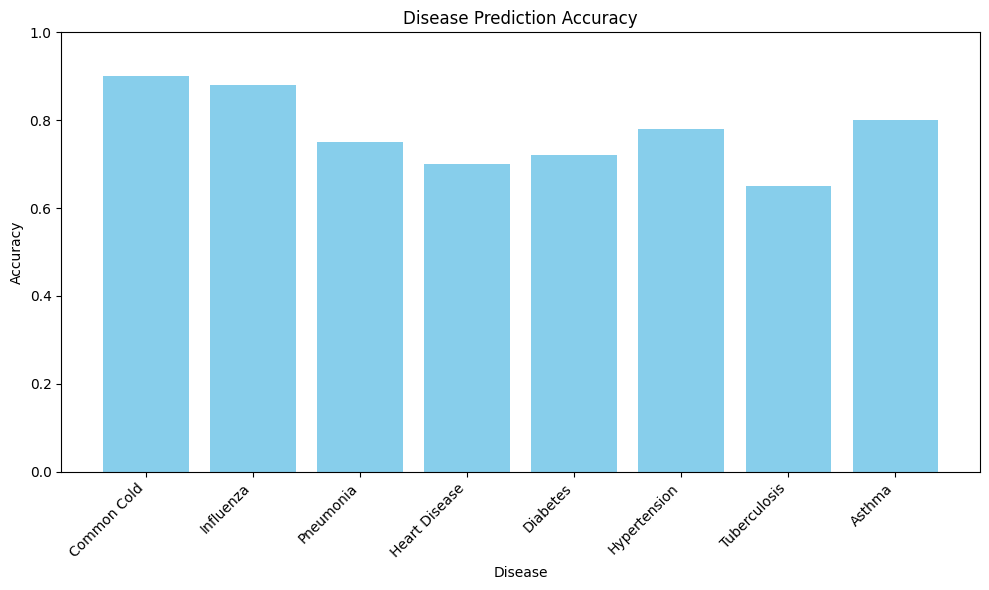

In [3]:
#Disease Prediction Accuracy

import matplotlib.pyplot as plt

# Disease names and their corresponding accuracy scores
disease_accuracy = {
    'Common Cold': 0.90,
    'Influenza': 0.88,
    'Pneumonia': 0.75,
    'Heart Disease': 0.70,
    'Diabetes': 0.72,
    'Hypertension': 0.78,
    'Tuberculosis': 0.65,
    'Asthma': 0.80
}

# Extracting the disease names and their accuracy scores
diseases = list(disease_accuracy.keys())
accuracies = list(disease_accuracy.values())

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(diseases, accuracies, color='skyblue')

# Adding titles and labels
plt.title('Disease Prediction Accuracy')
plt.xlabel('Disease')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the bar chart
plt.tight_layout()
plt.show()


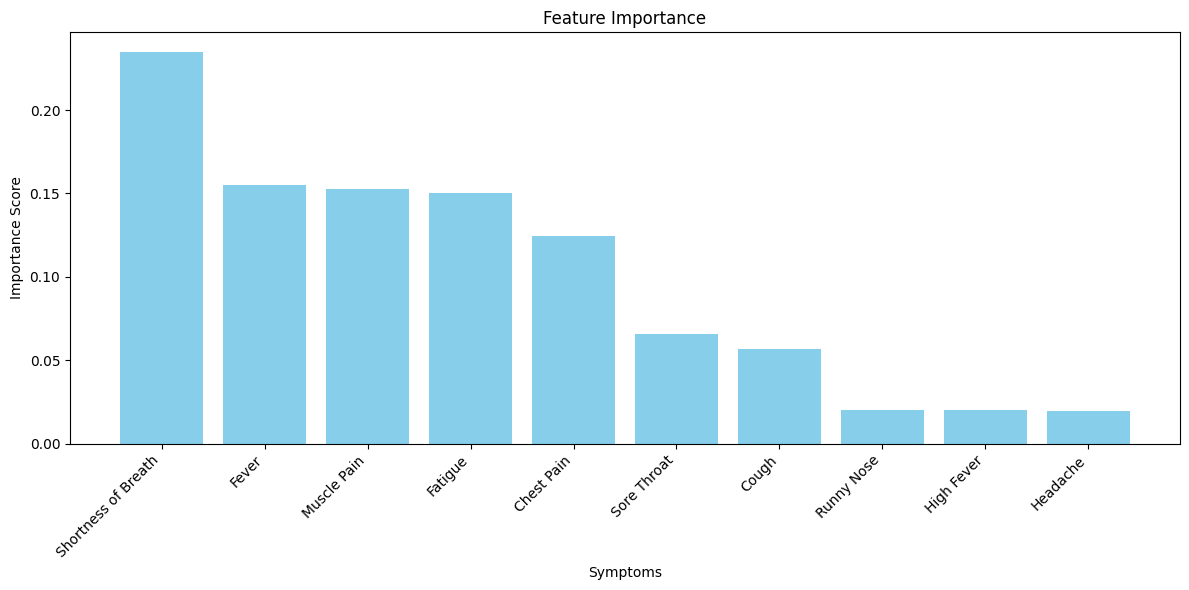

In [4]:
#Feature Importance
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate a synthetic dataset for example purposes
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)
feature_names = ['Fever', 'Cough', 'Headache', 'Chest Pain', 'Shortness of Breath', 'Fatigue', 'Sore Throat', 'Runny Nose', 'High Fever', 'Muscle Pain']

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Extract feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Create the bar chart for feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center', color='skyblue')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.title('Feature Importance')
plt.xlabel('Symptoms')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()
